In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, string, nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
punct = string.punctuation + ")" + "(" + ":" + ";"

In [2]:
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Data_Test.xlsx')
sample = pd.read_excel('Sample_Submission.xlsx')

In [3]:
train.head(60)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62
5,ChiRunning: A Revolutionary Approach to Effort...,Danny Dreyer,"Paperback,– 5 May 2009",4.5 out of 5 stars,8 customer reviews,The revised edition of the bestselling ChiRunn...,Healthy Living & Wellness (Books),Sports,900.00
6,Death on the Nile (Poirot),Agatha Christie,"Paperback,– 5 Oct 2017",4.4 out of 5 stars,72 customer reviews,Agatha Christie’s most exotic murder mystery\n...,"Crime, Thriller & Mystery (Books)","Crime, Thriller & Mystery",224.00
7,Yoga Your Home Practice Companion: A Complete ...,Sivananda Yoga Vedanta Centre,"Hardcover,– Import, 1 Mar 2018",4.7 out of 5 stars,16 customer reviews,"Achieve a healthy body, mental alertness, and ...",Sports Training & Coaching (Books),Sports,836.00
8,Karmayogi: A Biography of E. Sreedharan,M S Ashokan,"Paperback,– 15 Dec 2015",4.2 out of 5 stars,111 customer reviews,Karmayogi is the dramatic and inspiring story ...,Biographies & Autobiographies (Books),"Biographies, Diaries & True Accounts",130.00
9,"The Iron King (The Accursed Kings, Book 1)",Maurice Druon,"Paperback,– 26 Mar 2013",4.0 out of 5 stars,1 customer review,‘This is the original game of thrones’ George ...,Action & Adventure (Books),Action & Adventure,695.00


In [4]:
test.head(60)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"
5,Understanding a Photograph (Penguin Modern Cla...,John Berger,"Paperback,– 7 Nov 2013",5.0 out of 5 stars,2 customer reviews,John Berger's writings on photography are some...,"Arts History, Theory & Criticism (Books)","Arts, Film & Photography"
6,Dance Music Manual,Rick Snoman,"Paperback,– Import, 5 Feb 2019",5.0 out of 5 stars,1 customer review,"Dance Music Manual, aimed at the novice and se...",Music Books,"Computing, Internet & Digital Media"
7,A Clash of Kings (A Song of Ice and Fire),George R.R. Martin,"Paperback,– 29 Mar 2012",4.3 out of 5 stars,117 customer reviews,"The second volume of A Song of Ice and Fire, t...",Action & Adventure (Books),"Crime, Thriller & Mystery"
8,An Era of Darkness: The British Empire in India,Shashi Tharoor,"Hardcover,– 27 Oct 2016",4.4 out of 5 stars,550 customer reviews,"In 1930, the American historian and philosophe...",Asian History,Politics
9,Doing Justice: A Prosecutor’s Thoughts on Crim...,Preet Bharara,"Paperback,– 19 Mar 2019",4.4 out of 5 stars,6 customer reviews,A Guardian Pick for 2019\nThe People vs. Putin...,True Accounts (Books),Action & Adventure


In [5]:
train.describe(include=['O','float'])

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
count,6237,6237,6237,6237,6237,6237,6237,6237,6237.000000
unique,5568,3679,3370,36,342,5549,345,11,NaN
top,Casino Royale: James Bond 007 (Vintage),Agatha Christie,"Paperback,– 5 Oct 2017",5.0 out of 5 stars,1 customer review,A Tinkle Double Digest is two Tinkle Digests i...,Action & Adventure (Books),Action & Adventure,NaN
freq,4,69,48,1375,1040,8,947,818,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,560.707516
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,690.110657
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.180000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,373.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.000000


In [6]:
test.describe(include=['O','float'])

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
count,1560,1560,1560,1560,1560,1560,1560,1560
unique,1521,1224,1259,30,163,1519,225,11
top,The Five Greatest Warriors (Jack West Series),Agatha Christie,"Paperback,– 2016",5.0 out of 5 stars,1 customer review,The end is approaching ... Can Jack West unrav...,Action & Adventure (Books),Action & Adventure
freq,3,18,12,376,288,3,236,218


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
Title           6237 non-null object
Author          6237 non-null object
Edition         6237 non-null object
Reviews         6237 non-null object
Ratings         6237 non-null object
Synopsis        6237 non-null object
Genre           6237 non-null object
BookCategory    6237 non-null object
Price           6237 non-null float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
Title           1560 non-null object
Author          1560 non-null object
Edition         1560 non-null object
Reviews         1560 non-null object
Ratings         1560 non-null object
Synopsis        1560 non-null object
Genre           1560 non-null object
BookCategory    1560 non-null object
dtypes: object(8)
memory usage: 97.6+ KB


In [9]:
train.Price = np.log1p(train.Price)

In [10]:
q1 = train.Price.quantile(0.25)
q3 = train.Price.quantile(0.75)
iqr = q3-q1
upper = q3+2.5*iqr
lower = q1-2.5*iqr
x = np.where((train.Price < lower )| (train.Price.values>upper))
train.drop(index = x[0], inplace=True)
train.reset_index(drop=True, inplace=True)

In [11]:
def words(text):
    return(len(str(text).lower().split())/len(str(text)))

def n_unique_word(text):
    return(len(set(str(text).lower().split()))/len(str(text)))

def letter(text):
    return(len(str(text)))

def n_clean_words(text):
    s = [w for w in str(text).split() if w not in stopwords and w not in list(punct)]
    return(len(s)/len(str(text)))

def n_stopwords(text):
    s = [w for w in str(text).split() if w in stopwords]
    return(len(s)/len(str(text)))

def n_punctuation(text):
    s = [w for w in str(text).lower().split() if w in list(punct)]
    return(len(s)/len(str(text)))

def n_title(text):
    s = [w for w in str(text).split() if w.istitle()]
    return(len(s)/len(str(text)))

def n_Upper(text):
    s = [w for w in str(text).split() if w.isupper()]
    return(len(s)/len(str(text)))

def n_Lower(text):
    s = [w for w in str(text).split() if w.islower()]
    return(len(s)/len(str(text)))

train['Title_unique_word'] = train.Title.apply(lambda x: n_unique_word(x))
test['Title_unique_word'] = test.Title.apply(lambda x: n_unique_word(x))

train['Synopsis_unique_word'] = train.Synopsis.apply(lambda x: n_unique_word(x))
test['Synopsis_unique_word'] = test.Synopsis.apply(lambda x: n_unique_word(x))

train['Title_count'] = train.Title.apply(lambda x: words(x))
test['Title_count'] = test.Title.apply(lambda x: words(x))

train['Synopsis_count'] = train.Synopsis.apply(lambda x: words(x))
test['Synopsis_count'] = test.Synopsis.apply(lambda x: words(x))

train['Title_count_char'] = train.Title.apply(lambda x: letter(x))
test['Title_count_char'] = test.Title.apply(lambda x: letter(x))

train['Synopsis_count_char'] = train.Synopsis.apply(lambda x: letter(x))
test['Synopsis_count_char'] = test.Synopsis.apply(lambda x: letter(x))

train['Title_n_st'] = train.Title.apply(lambda x: n_stopwords(x))
test['Title_n_st'] = test.Title.apply(lambda x: n_stopwords(x))

train['Synopsis_n_st'] = train.Synopsis.apply(lambda x: n_stopwords(x))
test['Synopsis_n_st'] = test.Synopsis.apply(lambda x: n_stopwords(x))

train['Title_n_punct'] = train.Title.apply(lambda x: n_punctuation(x))
test['Title_n_punct'] = test.Title.apply(lambda x: n_punctuation(x))

train['Synopsis_n_punct'] = train.Synopsis.apply(lambda x: n_punctuation(x))
test['Synopsis_n_punct'] = test.Synopsis.apply(lambda x: n_punctuation(x))

train['Title_title_word'] = train.Title.apply(lambda x: n_title(x))
test['Title_title_word'] = test.Title.apply(lambda x: n_title(x))

train['Synopsis_title_word'] = train.Synopsis.apply(lambda x: n_title(x))
test['Synopsis_title_word'] = test.Synopsis.apply(lambda x: n_title(x))

train['Title_upper_word'] = train.Title.apply(lambda x: n_Upper(x))
test['Title_upper_word'] = test.Title.apply(lambda x: n_Upper(x))

train['Synopsis_upper_word'] = train.Synopsis.apply(lambda x: n_Upper(x))
test['Synopsis_upper_word'] = test.Synopsis.apply(lambda x: n_Upper(x))

train['Title_lower_word'] = train.Title.apply(lambda x: n_Lower(x))
test['Title_lower_word'] = test.Title.apply(lambda x: n_Lower(x))

train['Synopsis_lower_word'] = train.Synopsis.apply(lambda x: n_Lower(x))
test['Synopsis_lower_word'] = test.Synopsis.apply(lambda x: n_Lower(x))

train['Title_n_clean_word'] = train.Title.apply(lambda x: n_clean_words(x))
test['Title_n_clean_word'] = test.Title.apply(lambda x: n_clean_words(x))

train['Synopsis_n_clean_word'] = train.Synopsis.apply(lambda x: n_clean_words(x))
test['Synopsis_n_clean_word'] = test.Synopsis.apply(lambda x: n_clean_words(x))

#train['Title_0'] = train.Title.str.extract(r"(^.*):+(.*$)")[0]
#train['Title_1'] = train.Title.str.extract(r"(^.*):+(.*$)")[1]

#test['Title_0'] = test.Title.str.extract(r"(^.*):+(.*$)")[0]
#test['Title_1'] = test.Title.str.extract(r"(^.*):+(.*$)")[1]

#train['Title_0'] = train.Title_0.apply(lambda x: words(x))
#test['Title_0'] = test.Title_0.apply(lambda x: words(x))

#train['Title_1'] = train.Title_1.apply(lambda x: words(x))
#test['Title_1'] = test.Title_1.apply(lambda x: words(x))

In [12]:
au_tr = set(train.Author).difference(set(test.Author))
au_te = set(test.Author).difference(set(train.Author))
train.Author = train.Author.apply(lambda x: 'other' if x in list(au_tr) else x)
test.Author = test.Author.apply(lambda x: 'other' if x in (au_te) else x)

In [13]:
train['time'] = train.Edition.str.extract(r"(\d* [a-zA-Z]* \d\d\d\d$)")
test['time']  = test.Edition.str.extract(r"(\d* [a-zA-Z]* \d\d\d\d$)")

import datetime
def days(text):
    try :
        x = datetime.datetime.strptime(str(text), "%d %b %Y")
    except :
        x = 0
    return(x)

train['time'] = train.time.apply(lambda x: days(x))
test['time']  = test.time.apply(lambda x: days(x))

def jj(text):
    try:
        x = datetime.datetime.now() - text
        y = x.days
    except:
        y = 0
    return(y)
train['time'] = train.time.apply(lambda x: jj(x))
test['time'] = test.time.apply(lambda x: jj(x))

In [14]:
#train['Date'] = train.Edition.str.extract(r"(\d\d\d\d$)")
#test['Date'] = test.Edition.str.extract(r"(\d\d\d\d$)")

#train.Date.fillna(2014, inplace=True)
#test.Date.fillna(2014, inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

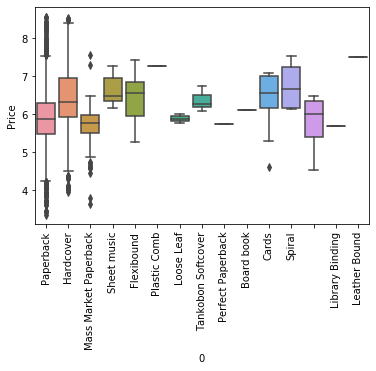

In [15]:
sns.boxplot(train.Edition.str.extract(r'(^[a-zA-Z|\s]*)')[0], train.Price)
#test.Edition.str.extract(r'(^[a-zA-Z|\s]*)')[0].value_counts()
plt.xticks(rotation=90)

In [16]:
train.Edition.str.extract(r'(^[a-zA-Z|\s]*)')[0].value_counts()

Paperback                5185
Hardcover                 813
Mass Market Paperback     155
Sheet music                24
Flexibound                 15
Cards                       8
Spiral                      4
                            4
Tankobon Softcover          3
Loose Leaf                  2
Library Binding             1
Leather Bound               1
Perfect Paperback           1
Board book                  1
Plastic Comb                1
Name: 0, dtype: int64

In [17]:
train['Edition_1'] = train.Edition.str.extract(r'(^[a-zA-Z|\s]*)')
test['Edition_1'] = test.Edition.str.extract(r'(^[a-zA-Z|\s]*)')

train.Edition_1.replace({'':'Mass Market Paperback'}, inplace=True)
test.Edition_1.replace({'':'Mass Market Paperback'}, inplace=True)

g = train.Edition.str.extract(r'(^[a-zA-Z|\s]*)')[0].value_counts().index[0:5]

train.Edition_1 = train.Edition_1.apply(lambda x: 'other' if x not in g else x)
test.Edition_1 = test.Edition_1.apply(lambda x: 'other' if x not in g else x)

In [18]:
#train['Edition_1'] = train.Edition.str.extract(r'(^[a-zA-Z|\s]*),.*')
#test['Edition_1'] = test.Edition.str.extract(r'(^[a-zA-Z|\s]*),.*')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

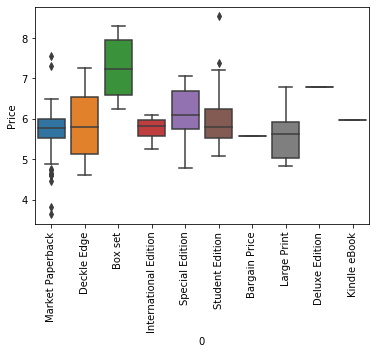

In [19]:
sns.boxplot(train.Edition.str.extract(r'^.*-* ([a-zA-Z|\s]* [a-zA-Z|\s]*),.*')[0], train.Price)
#test.Edition.str.extract(r'(^[a-zA-Z|\s]*)')[0].value_counts()
plt.xticks(rotation=90)

In [20]:
train.Edition.str.extract(r'^.*-* ([a-zA-Z|\s]* [a-zA-Z|\s]*),.*')[0].value_counts()

Market Paperback         154
Special Edition           18
Student Edition           14
Box set                   11
International Edition     10
Large Print                9
Deckle Edge                7
Kindle eBook               1
Deluxe Edition             1
Bargain Price              1
Name: 0, dtype: int64

In [21]:
test.Edition.str.extract(r'^.*-* ([a-zA-Z|\s]* [a-zA-Z|\s]*),.*')[0].value_counts()

Market Paperback         45
International Edition     4
Box set                   3
Special Edition           3
Student Edition           2
Large Print               1
Kindle eBook              1
Deckle Edge               1
Name: 0, dtype: int64

In [22]:
train['Edition_2'] = train.Edition.str.extract(r'^.*-* ([a-zA-Z|\s]* [a-zA-Z|\s]*),.*')
test['Edition_2'] = test.Edition.str.extract(r'^.*-* ([a-zA-Z|\s]* [a-zA-Z|\s]*),.*')

g = train.Edition.str.extract(r'^.*-* ([a-zA-Z|\s]* [a-zA-Z|\s]*),.*')[0].value_counts().index[0:7]

train.Edition_2 = train.Edition_2.apply(lambda x: 'other' if x not in g else x)
test.Edition_2 = test.Edition_2.apply(lambda x: 'other' if x not in g else x)

In [23]:
train['Edition_3'] = train.Edition.str.extract(r'^.* -*(.*),.*')
test['Edition_3'] = test.Edition.str.extract(r'^.* -*(.*),.*')

In [24]:
train.Edition_3.fillna('NA', inplace=True)
test.Edition_3.fillna('NA', inplace=True)

In [25]:
t = set(train.Edition_3.value_counts().index).difference(set(test.Edition_3.value_counts().index))
train.Edition_3 = train.Edition_3.apply(lambda x: np.NaN if x in list(t) else x)

In [26]:
train.dropna(inplace=True)
train.reset_index(drop=True, inplace=True)

In [27]:
train['Review_t'] = train.Reviews.str.extract(r"(^\d\.*\d*)")
test['Review_t'] = test.Reviews.str.extract(r"(^\d\.*\d*)")

In [28]:
train['Rating_t'] = train.Ratings.str.extract(r"(^\d+)")
test['Rating_t'] = test.Ratings.str.extract(r"(^\d+)")

In [29]:
train['Rat_Rev'] = train.Rating_t.astype('float') * train.Review_t.astype('float')
test['Rat_Rev'] = test.Rating_t.astype('float') * test.Review_t.astype('float')

train['Raev'] = train.Rating_t.astype('float') / train.Review_t.astype('float')
test['Raev'] = test.Rating_t.astype('float') / test.Review_t.astype('float')

train['day_review'] = train.time.astype('float')/train.Review_t.astype('float')
test['day_review'] = test.time.astype('float')/test.Review_t.astype('float')

In [30]:
train['sum'] = np.sum(train, axis = 1)
train['min'] = np.min(train, axis = 1)
train['max'] = np.max(train, axis = 1)
train['std'] = np.std(train, axis = 1)
train['skew'] = train.skew(axis = 1)
train['kurt'] = train.kurt(axis = 1)
train['mean'] = np.mean(train, axis=1)
#train['median'] = np.median(train, axis=1)

test['sum'] = np.sum(test, axis = 1)
test['min'] = np.min(test, axis = 1)
test['max'] = np.max(test, axis = 1)
test['std'] = np.std(test, axis = 1)
test['skew'] = test.skew(axis = 1)
test['kurt'] = test.kurt(axis = 1)
test['mean'] = np.mean(test, axis=1)
#test['median'] = np.median(test, axis=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

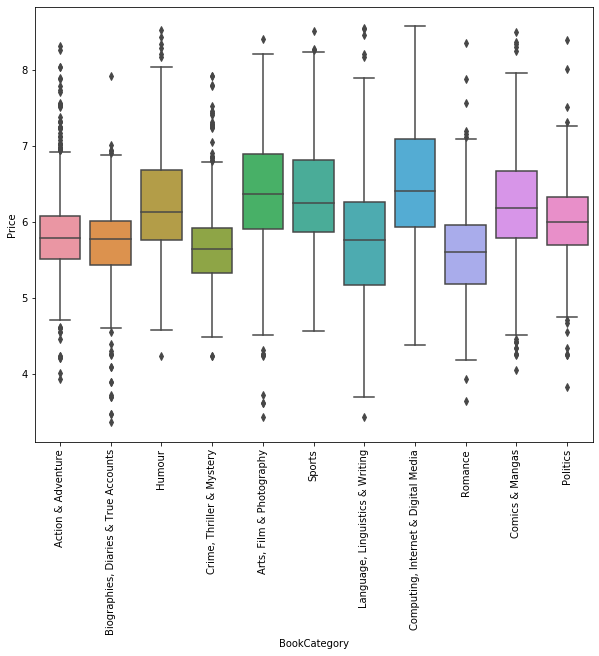

In [31]:
fig = plt.figure(figsize=(10,8))
sns.boxplot(train.BookCategory, train.Price)
plt.xticks(rotation=90)

In [32]:
train.Genre.value_counts()

Action & Adventure (Books)               945
Romance (Books)                          418
Biographies & Autobiographies (Books)    373
Crime, Thriller & Mystery (Books)        274
Contemporary Fiction (Books)             256
                                        ... 
Target Shooting (Books)                    1
International Entrance Exams               1
Sikhism (Books)                            1
GMAT                                       1
Italian                                    1
Name: Genre, Length: 345, dtype: int64

In [33]:
test.Genre.value_counts()

Action & Adventure (Books)               236
Romance (Books)                           98
Biographies & Autobiographies (Books)     90
Contemporary Fiction (Books)              69
Crime, Thriller & Mystery (Books)         59
                                        ... 
Children's Adventure (Books)               1
Software Design & Engineering              1
Functional Software Programming            1
Industrial Engineering                     1
Reading Skills                             1
Name: Genre, Length: 225, dtype: int64

In [34]:
au_tr = set(train.Genre).difference(set(test.Genre))
au_te = set(test.Genre).difference(set(train.Genre))
train['Genre_t'] = train.Genre.apply(lambda x: 'other' if x in list(au_tr) else x)
test['Genre_t'] = test.Genre.apply(lambda x: 'other' if x in (au_te) else x)

In [35]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tfidf = TfidfVectorizer(1,1, stop_words='english', use_idf=True)
x = tfidf.fit_transform(pd.concat([train.Synopsis, test.Synopsis], axis = 0).str.lower())

tfidf = TfidfVectorizer(ngram_range=(1,1), stop_words='english', use_idf=True)
z = tfidf.fit_transform(pd.concat([train.Title, test.Title], axis = 0).str.lower())

tfidf = TfidfVectorizer(ngram_range=(1,1), stop_words='english', use_idf=True)
e = tfidf.fit_transform(pd.concat([train.Genre_t, test.Genre_t], axis = 0).str.lower())

In [36]:
#x = CountVectorizer().fit_transform(pd.concat([train.Synopsis, test.Synopsis], axis = 0))

In [37]:
from sklearn.decomposition import TruncatedSVD
pca = TruncatedSVD(n_components=80)
x = pd.DataFrame(pca.fit_transform(x), columns = [a for a in range(80)])
z = pd.DataFrame(pca.fit_transform(z), columns = [a for a in range(80,160)])
e = pd.DataFrame(pca.fit_transform(e), columns = [a for a in range(160,240)])

In [38]:
np.sum(pca.explained_variance_ratio_)

0.9124036446545247

In [39]:
train.shape, test.shape

((6207, 44), (1560, 43))

In [40]:
tr = x.iloc[:6207,:]
te = x.iloc[6207:,:]
te.reset_index(drop = True, inplace=True)

tr_z = z.iloc[:6207,:]
te_z = z.iloc[6207:,:]
te_z.reset_index(drop = True, inplace=True)

tr_e = e.iloc[:6207,:]
te_e = e.iloc[6207:,:]
te_e.reset_index(drop = True, inplace=True)

In [41]:
train = pd.concat([train, tr, tr_z, tr_e], axis = 1)
test = pd.concat([test, te, te_z, te_e], axis = 1)

In [42]:
train.reset_index(drop = True, inplace=True)
train.shape, test.shape

((6207, 284), (1560, 283))

In [43]:
train.drop(columns = ['Title', 'Edition', 'Reviews','Ratings', 'Synopsis','Genre'], inplace=True)
test.drop(columns = ['Title', 'Edition', 'Reviews','Ratings', 'Synopsis','Genre'], inplace=True)

In [44]:
(train.info(), test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6207 entries, 0 to 6206
Columns: 278 entries, Author to 239
dtypes: float64(267), int64(3), object(8)
memory usage: 13.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Columns: 277 entries, Author to 239
dtypes: float64(266), int64(3), object(8)
memory usage: 3.3+ MB


(None, None)

In [45]:
train.Author = train.Author.astype('category')
train.BookCategory = train.BookCategory.astype('category')
train.Edition_1 = train.Edition_1.astype('category')
train.Edition_2 = train.Edition_2.astype('category')
train.Edition_3 = train.Edition_3.astype('category')
train.Genre_t = train.Genre_t.astype('category')
train.Rating_t = train.Rating_t.astype('float')
train.Review_t = train.Review_t.astype('float')
#train.month = train.month.astype('category')

test.Author = test.Author.astype('category')
test.BookCategory = test.BookCategory.astype('category')
test.Edition_1 = test.Edition_1.astype('category')
test.Edition_2 = test.Edition_2.astype('category')
test.Edition_3 = test.Edition_3.astype('category')
test.Genre_t = test.Genre_t.astype('category')
#test.month = test.month.astype('category')
test.Rating_t = test.Rating_t.astype('float')
test.Review_t = test.Review_t.astype('float')

#train.Date = train.Date.apply(lambda x: 2019-int(x))
#test.Date = test.Date.apply(lambda x: 2019-int(x))

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6207 entries, 0 to 6206
Columns: 278 entries, Author to 239
dtypes: category(6), float64(269), int64(3)
memory usage: 13.0 MB


In [47]:
train_label = train.Price
train.drop(columns = 'Price', inplace=True)

In [48]:
train.shape, test.shape

((6207, 277), (1560, 277))

0.33052713640208375 0.6455296616447597


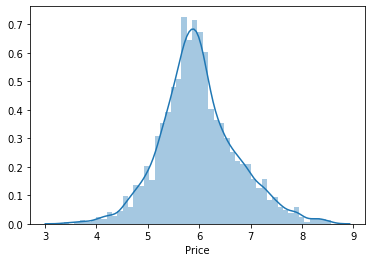

In [49]:
sns.distplot(train_label)
print(train_label.skew(), train_label.kurt())

In [50]:
pd.set_option('max_column',200)
train.head()

,Author,BookCategory,Title_unique_word,Synopsis_unique_word,Title_count,Synopsis_count,Title_count_char,Synopsis_count_char,Title_n_st,Synopsis_n_st,Title_n_punct,Synopsis_n_punct,Title_title_word,Synopsis_title_word,Title_upper_word,Synopsis_upper_word,Title_lower_word,Synopsis_lower_word,Title_n_clean_word,Synopsis_n_clean_word,time,Edition_1,Edition_2,Edition_3,Review_t,Rating_t,Rat_Rev,Raev,day_review,sum,min,max,std,skew,kurt,mean,Genre_t,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,...,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239
0,other,Action & Adventure,0.171429,0.126422,0.171429,0.165613,35,791,0.000000,0.059418,0.0,0.0,0.114286,0.030341,0.000000,0.005057,0.000000,0.127686,0.171429,0.106195,1325,Paperback,other,NA,4.0,8.0,32.0,2.000000,331.250000,2522.897467,0.0,2522.897467,707.652264,2.578675,6.315670,285.697897,Action & Adventure (Books),0.096843,-0.060140,0.013973,-0.003376,0.019320,-0.013461,-0.002568,-0.059180,-0.004179,0.036968,-0.009864,-0.002257,0.012354,-0.009510,-0.005717,0.007464,0.024314,-0.012759,-0.009302,0.003751,0.011432,-0.002105,-0.024647,0.008195,-0.022693,-0.029732,-0.014764,-0.018245,-0.001719,-0.000326,0.023985,0.018971,-0.013401,0.006004,-0.014116,-0.021252,-0.026484,-0.025398,-0.028077,-0.006472,0.027723,-0.051793,0.019203,-0.011455,0.030271,-0.004412,0.007431,-0.052294,0.020915,-0.028233,0.045177,0.026556,-0.027633,-0.022607,0.029154,0.020240,-0.040126,0.019020,-0.001745,0.022890,0.003597,0.009648,0.027572,...,0.002610,-0.002609,0.009749,-0.010743,-0.016736,-0.004374,0.003263,0.010535,0.004092,-0.014993,-0.003159,0.005599,0.000379,-0.009895,-0.015361,-0.006585,0.003694,0.004830,-0.002431,0.000156,9.919174e-01,-1.218669e-01,-1.120697e-02,-9.857128e-03,-2.325338e-02,-8.424698e-06,-1.916163e-02,-4.510759e-03,-3.105623e-03,-3.293969e-03,-1.243614e-04,-3.573714e-03,-1.174271e-03,-0.004767,1.069290e-10,-6.417781e-04,-0.002288,3.055673e-04,-0.000654,-1.676257e-03,-3.426932e-04,-1.279424e-03,-1.332796e-03,-2.998100e-04,-0.002418,-0.001348,0.000259,-0.002608,-0.000031,-0.000403,-0.000389,-0.001125,-0.001068,-0.001006,0.001584,-0.000913,-0.000194,-0.000726,0.000395,0.000534,0.000199,-0.000133,-0.000353,-0.000594,-0.000297,0.000383,-0.000348,-0.000164,0.000018,-0.000672,0.000010,-0.000385,-0.000003,-0.000342,0.000036,0.000046,-0.000585,0.000003,-0.000474,-0.000163,-0.000020,-0.000149,-0.000211,-0.000728,-0.000060,0.000128,-0.000154,-0.000032,0.000107,-0.000166,0.000016,-0.000138,-0.000024,-0.000001,-0.000067,-0.000322,0.000242,0.000103,-0.000235,-0.000068
1,Arun Khopkar,"Biographies, Diaries & True Accounts",0.205882,0.104712,0.205882,0.159686,34,1146,0.029412,0.050611,0.0,0.0,0.176471,0.036649,0.029412,0.001745,0.029412,0.117801,0.176471,0.109075,2544,Paperback,other,NA,3.9,14.0,54.6,3.589744,652.307692,4441.248433,0.0,4441.248433,1253.250154,2.570345,6.190734,502.957122,Cinema & Broadcast (Books),0.109514,0.008713,-0.003951,0.041583,-0.009894,0.014290,0.011311,-0.008584,-0.038812,-0.045805,0.028730,0.020626,0.045372,-0.002649,-0.020795,-0.033115,0.013723,-0.011875,0.030435,-0.015930,-0.034621,-0.005803,-0.002126,-0.012180,0.013717,-0.069175,0.007940,-0.014501,0.004020,-0.023407,-0.025017,0.043945,-0.045879,-0.029142,0.064877,0.023651,-0.003761,0.012849,-0.017194,0.021567,0.068663,0.017097,0.020031,-0.022658,0.040764,-0.017077,0.027910,-0.004451,-0.031450,0.057935,-0.023787,-0.020090,-0.008539,-0.012919,-0.001018,-0.012828,-0.016872,-0.037420,-0.040630,-0.001977,-0.012831,0.035670,-0.007934,...,-0.001239,0.009162,0.007725,

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = pd.concat([train,test], axis = 0)
df.Author = le.fit_transform(df.Author)
df.Genre_t = le.fit_transform(df.Genre_t)
train.shape, test.shape

((6207, 277), (1560, 277))

In [52]:
train = df.iloc[:6207,:]
test = df.iloc[6207:,:]
test.reset_index(drop=True, inplace=True)

In [53]:
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)
print(train.shape, test.shape)

(6207, 308) (1560, 308)


In [54]:
train.head()

,Author,Title_unique_word,Synopsis_unique_word,Title_count,Synopsis_count,Title_count_char,Synopsis_count_char,Title_n_st,Synopsis_n_st,Title_n_punct,Synopsis_n_punct,Title_title_word,Synopsis_title_word,Title_upper_word,Synopsis_upper_word,Title_lower_word,Synopsis_lower_word,Title_n_clean_word,Synopsis_n_clean_word,time,Review_t,Rating_t,Rat_Rev,Raev,day_review,sum,min,max,std,skew,kurt,mean,Genre_t,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,...,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports,Edition_1_Hardcover,Edition_1_Mass Market Paperback,Edition_1_Paperback,Edition_1_Sheet music,Edition_1_other,Edition_2_Deckle Edge,Edition_2_International Edition,Edition_2_Large Print,Edition_2_Market Paperback,Edition_2_Special Edition,Edition_2_Student Edition,Edition_2_other,Edition_3_Audiobook,Edition_3_Edge,Edition_3_Edition,Edition_3_Illustrated,Edition_3_Import,Edition_3_Leaf,Edition_3_NA,Edition_3_Paperback,Edition_3_Print,Edition_3_Unabridged,Edition_3_eBook,Edition_3_music,Edition_3_set
0,530,0.171429,0.126422,0.171429,0.165613,35,791,0.000000,0.059418,0.0,0.0,0.114286,0.030341,0.000000,0.005057,0.000000,0.127686,0.171429,0.106195,1325,4.0,8.0,32.0,2.000000,331.250000,2522.897467,0.0,2522.897467,707.652264,2.578675,6.315670,285.697897,1,0.096843,-0.060140,0.013973,-0.003376,0.019320,-0.013461,-0.002568,-0.059180,-0.004179,0.036968,-0.009864,-0.002257,0.012354,-0.009510,-0.005717,0.007464,0.024314,-0.012759,-0.009302,0.003751,0.011432,-0.002105,-0.024647,0.008195,-0.022693,-0.029732,-0.014764,-0.018245,-0.001719,-0.000326,0.023985,0.018971,-0.013401,0.006004,-0.014116,-0.021252,-0.026484,-0.025398,-0.028077,-0.006472,0.027723,-0.051793,0.019203,-0.011455,0.030271,-0.004412,0.007431,-0.052294,0.020915,-0.028233,0.045177,0.026556,-0.027633,-0.022607,0.029154,0.020240,-0.040126,0.019020,-0.001745,0.022890,0.003597,0.009648,0.027572,-0.003350,-0.004401,-0.004581,-0.016462,...,-6.417781e-04,-0.002288,3.055673e-04,-0.000654,-1.676257e-03,-3.426932e-04,-1.279424e-03,-1.332796e-03,-2.998100e-04,-0.002418,-0.001348,0.000259,-0.002608,-0.000031,-0.000403,-0.000389,-0.001125,-0.001068,-0.001006,0.001584,-0.000913,-0.000194,-0.000726,0.000395,0.000534,0.000199,-0.000133,-0.000353,-0.000594,-0.000297,0.000383,-0.000348,-0.000164,0.000018,-0.000672,0.000010,-0.000385,-0.000003,-0.000342,0.000036,0.000046,-0.000585,0.000003,-0.000474,-0.000163,-0.000020,-0.000149,-0.000211,-0.000728,-0.000060,0.000128,-0.000154,-0.000032,0.000107,-0.000166,0.000016,-0.000138,-0.000024,-0.000001,-0.000067,-0.000322,0.000242,0.000103,-0.000235,-0.000068,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,36,0.205882,0.104712,0.205882,0.159686,34,1146,0.029412,0.050611,0.0,0.0,0.176471,0.036649,0.029412,0.001745,0.029412,0.117801,0.176471,0.109075,2544,3.9,14.0,54.6,3.589744,652.307692,4441.248433,0.0,4441.248433,1253.250154,2.570345,6.190734,502.957122,49,0.109514,0.008713,-0.003951,0.041583,-0.009894,0.014290,0.011311,-0.008584,-0.038812,-0.045805,0.028730,0.020626,0.045372,-0.002649,-0.020795,-0.033115,0.013723,-0.011875,0.030435,-0.015930,-0.034621,-0.005803,-0.002126,-0.012180,0.013717,-0.069175,0.007940,-0.014501,0.004020,-0.023407,-0.025017,0.043945,-0.045879,-0.029142,0.064877,0.023651,-0.003761,0.012849,-0.017194,0.021567,0.068663,0.017097,0.

In [55]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
train_label.reset_index(drop=True, inplace=True)

In [56]:
#from sklearn.preprocessing import MinMaxScaler
#mmx = MinMaxScaler()
#train = pd.DataFrame(mmx.fit_transform(train), columns = train.columns)
#test = pd.DataFrame(mmx.fit_transform(test), columns = test.columns)

In [57]:
train.shape, test.shape

((6207, 308), (1560, 308))

In [58]:
set(train.columns).difference(set(test.columns))

set()

# ML

In [59]:
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import RandomizedSearchCV, train_test_split

def rmsle(y_pred, y_test) : 
    return(1-(np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_test))**2))))
metric = make_scorer(rmsle)

In [60]:
def CrossVal(dataX,dataY,mode,cv=3):
    score=cross_val_score(mode,dataX , dataY, cv=cv, scoring=metric)
    print("cv score",np.mean(score))
    return(np.mean(score))

In [804]:
CrossVal(train, train_label,lgb.LGBMRegressor(bagging_fration=0.76999999999999991, boosting_type='gbdt',
       class_weight=None, colsample_bytree=1.0,
       feature_fraction=0.28999999999999998, importance_type='split',
       lambda_l1=0.36999999999999994, lambda_l2=0.050000000000000003,
       learning_rate=0.03, max_depth=-1, min_child_samples=20,
       min_child_weight=0.001, min_gain_split=0.001, min_split_gain=0.0,
       n_estimators=1000, n_jobs=-1, num_leaves=86, objective=None,
       random_state=75, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0))

cv score 0.931208163552522


0.931208163552522

In [805]:
from sklearn.linear_model import LinearRegression
CrossVal(train, train_label,LinearRegression())

cv score 0.9999999999987644


0.9999999999987644

In [723]:
from sklearn.tree import DecisionTreeRegressor
CrossVal(train, train_label,DecisionTreeRegressor())

cv score 0.885149774703287


0.885149774703287

In [295]:
%%time
from sklearn.ensemble import AdaBoostRegressor
CrossVal(train, train_label,AdaBoostRegressor(DecisionTreeRegressor(), n_estimators = 50))

cv score 0.9240422982570092
Wall time: 3min 8s


0.9240422982570092

%%time
param = {'max_depth':[7,9,11,12], 'max_features':[41,101,65,61,57,71],
         'min_samples_split':[17,23,27,31], 
         'min_samples_leaf':[13,17,21,27], 'max_leaf_nodes':[20,25,30,35],
         'subsample':[0.2], 'random_state':[7643],
        'learning_rate' : [0.05], 'n_estimators': [1000]}

#r_search=RandomizedSearchCV( estimator=lgb.LGBMRegressor(), param_distributions=param , cv=3, n_jobs=-1, scoring=metric)
r_search.fit(train,train_label)
r_search.best_params_ ,r_search.best_score_

list(r_search.best_params_.items())

In [61]:
model = lgb.LGBMRegressor(bagging_fration=0.76999999999999991, boosting_type='gbdt',
       class_weight=None, colsample_bytree=1.0,
       feature_fraction=0.28999999999999998, importance_type='split',
       lambda_l1=0.36999999999999994, lambda_l2=0.050000000000000003,
       learning_rate=0.03, max_depth=-1, min_child_samples=20,
       min_child_weight=0.001, min_gain_split=0.001, min_split_gain=0.0,
       n_estimators=1000, n_jobs=-1, num_leaves=86, objective=None,
       random_state=975, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

model.fit(train, train_label)
answer = model.predict(test)

In [83]:
model = xgb.XGBRegressor(subsample = 0.9, objective = 'reg:squarederror',  
                         eval_metric = 'rmse', random_state = 23, n_estimators = 1000,
  min_samples_split = 11, min_samples_leaf = 25, max_leaf_nodes = 15, max_features = 45,
  max_depth = 9, learning_rate = 0.05)

model.fit(train, train_label)
answer = model.predict(test)

In [395]:
param_xgb =  {'subsample': 0.9, 'objective':'reg:squarederror', 'eval_metric': 'rmse', 'seed' : 23,
  'random_state': 23,
  'n_estimators': 1000,
  'min_samples_split': 11,
  'min_samples_leaf': 25,
  'max_leaf_nodes': 15,
  'max_features': 45,
  'max_depth': 9,
  'learning_rate': 0.05}

param_lgb = {}
param_lgb['objective'] = 'regression'
param_lgb['learning_rate'] = 0.03
param_lgb['seed'] = 975
param_lgb['metric'] = 'rmse'
param_lgb['bagging_fraction'] = 0.76999999999999991
param_lgb['feature_fraction'] = 0.28999999999999998
param_lgb['lambda_l1'] = 0.36999999999999994
param_lgb['lambda_l2'] = 0.050000000000000003
param_lgb['max_depth'] = 7
param_lgb['min_child_weight'] = 18.179739740988623
param_lgb['min_split_gain'] = 0.00
param_lgb['num_leaves'] = 86


def func(train, train_label, test, name):
    pred = pd.DataFrame(data = np.zeros(shape = (train.shape[0], 3)))
    pred.columns = [a for a in range(3)]
    
    pred_test = pd.DataFrame(data = np.zeros(shape = (test.shape[0], 3)))
    pred_test.columns = [a for a in range(3)]
    
    k = KFold(n_splits=3, shuffle=True, random_state=91)
    i = 0
    for t_index, v_index in k.split(train_label.ravel()):
        xtrain , ytrain = train.loc[t_index,:], train_label[t_index]
        xtest , ytest = train.loc[v_index,:], train_label[v_index]
        if(name == 'lgb'):
            trainset = lgb.Dataset(xtrain, label=ytrain)
            testset = lgb.Dataset(xtest, label=ytest)
            best = lgb.train(param_lgb , trainset, valid_sets=[trainset,testset], num_boost_round=10000,
                             early_stopping_rounds= 200)
            pred.loc[:,i] = best.predict(train, best_iteration = best.best_iteration)
            
            pred_test.loc[:,i] = best.predict(test, best_iteration = best.best_iteration)
            i = i +1
            
        else : 
            trainset = xgb.DMatrix(xtrain, label=ytrain)
            testset = xgb.DMatrix(xtest,label=ytest)
            t = xgb.DMatrix(test)
            f = xgb.DMatrix(train)
            best = xgb.train(list(param_xgb.items()) ,trainset, evals=[(trainset, 'train'),(testset,'test')],
                    num_boost_round=10000, early_stopping_rounds= 200)
            pred.loc[:,i] = best.predict(f, ntree_limit = best.best_ntree_limit)
            
            pred_test.loc[:,i] = best.predict(t, ntree_limit = best.best_ntree_limit)
            i = i +1
    
    return(pred,pred_test,best)

In [297]:
train_xgb, test_xgb, model = func(train,train_label, test, 'xgb')

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-rmse:5.26272	test-rmse:5.26912
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 200 rounds.
[1]	train-rmse:5.00443	test-rmse:5.01105
[2]	train-rmse:4.75883	test-rmse:4.76601
[3]	train-rmse:4.52602	test-rmse:4.53316
[4]	train-rmse:4.30469	test-rmse:4.31205
[5]	train-rmse:4.09493	test-rmse:4.10201
[6]	train-rmse:3.89528	test-rmse:3.90298
[7]	train-rmse:3.70626	test-rmse:3.71416
[8]	train-rmse:3.52631	test-rmse:3.53467
[9]	train-rmse:3.35557	test-rmse:3.36381
[10]	train-rmse:3.19355	test-rmse:3.20322
[11]	train-rmse:3.03963	test-rmse:3.05053
[12]	train-rmse:2.89368	test-rmse:2.90512
[13]	train-rmse:2.75528	test-rmse:2.76771
[14]	train-rmse:2.62449	test-rmse:2.63726
[15]	train-rmse:2.49979	test-rmse:2.51347
[16]	train-rmse:2.38154	test-rmse:2.39684
[17]	train-rmse:2.2692	test-rmse:2.28728
[18]	train-rmse:2.16232	test-rmse:2.18259
[19]	train-rmse:2.06115	test-rmse:2.08377
[20]	train-rmse:1.96497	tes

[184]	train-rmse:0.050151	test-rmse:0.498729
[185]	train-rmse:0.049695	test-rmse:0.498659
[186]	train-rmse:0.049161	test-rmse:0.498666
[187]	train-rmse:0.048439	test-rmse:0.498684
[188]	train-rmse:0.048109	test-rmse:0.49863
[189]	train-rmse:0.047859	test-rmse:0.498634
[190]	train-rmse:0.047404	test-rmse:0.498616
[191]	train-rmse:0.046983	test-rmse:0.498686
[192]	train-rmse:0.046716	test-rmse:0.498682
[193]	train-rmse:0.04623	test-rmse:0.498698
[194]	train-rmse:0.045585	test-rmse:0.498683
[195]	train-rmse:0.045496	test-rmse:0.498689
[196]	train-rmse:0.045	test-rmse:0.498681
[197]	train-rmse:0.044603	test-rmse:0.498642
[198]	train-rmse:0.044364	test-rmse:0.498624
[199]	train-rmse:0.043879	test-rmse:0.498597
[200]	train-rmse:0.043429	test-rmse:0.49859
[201]	train-rmse:0.043288	test-rmse:0.498592
[202]	train-rmse:0.042865	test-rmse:0.498585
[203]	train-rmse:0.042328	test-rmse:0.498575
[204]	train-rmse:0.042103	test-rmse:0.498567
[205]	train-rmse:0.041808	test-rmse:0.498527
[206]	train-rmse

[367]	train-rmse:0.022477	test-rmse:0.498126
[368]	train-rmse:0.022475	test-rmse:0.498122
[369]	train-rmse:0.022459	test-rmse:0.498134
[370]	train-rmse:0.022418	test-rmse:0.498138
[371]	train-rmse:0.022406	test-rmse:0.498145
[372]	train-rmse:0.02233	test-rmse:0.498142
[373]	train-rmse:0.022288	test-rmse:0.498147
[374]	train-rmse:0.022247	test-rmse:0.498144
[375]	train-rmse:0.022199	test-rmse:0.498162
[376]	train-rmse:0.022205	test-rmse:0.498172
[377]	train-rmse:0.022204	test-rmse:0.498173
[378]	train-rmse:0.022193	test-rmse:0.498171
[379]	train-rmse:0.022174	test-rmse:0.49817
[380]	train-rmse:0.022138	test-rmse:0.498172
[381]	train-rmse:0.022115	test-rmse:0.498176
[382]	train-rmse:0.022088	test-rmse:0.498174
[383]	train-rmse:0.022043	test-rmse:0.498176
[384]	train-rmse:0.022009	test-rmse:0.498179
[385]	train-rmse:0.021994	test-rmse:0.498181
[386]	train-rmse:0.021966	test-rmse:0.498182
[387]	train-rmse:0.021895	test-rmse:0.498181
[388]	train-rmse:0.021882	test-rmse:0.49818
[389]	train-r

[550]	train-rmse:0.018958	test-rmse:0.498078
[551]	train-rmse:0.018947	test-rmse:0.498077
[552]	train-rmse:0.018946	test-rmse:0.498077
[553]	train-rmse:0.018942	test-rmse:0.498074
[554]	train-rmse:0.018937	test-rmse:0.498074
[555]	train-rmse:0.018941	test-rmse:0.498074
[556]	train-rmse:0.018939	test-rmse:0.498071
[557]	train-rmse:0.018909	test-rmse:0.498071
[558]	train-rmse:0.018907	test-rmse:0.498066
[559]	train-rmse:0.01889	test-rmse:0.498068
[560]	train-rmse:0.018875	test-rmse:0.49807
[561]	train-rmse:0.01885	test-rmse:0.498068
[562]	train-rmse:0.018827	test-rmse:0.498066
[563]	train-rmse:0.018821	test-rmse:0.498062
[564]	train-rmse:0.018812	test-rmse:0.498056
[565]	train-rmse:0.018789	test-rmse:0.498055
[566]	train-rmse:0.018794	test-rmse:0.498057
[567]	train-rmse:0.018771	test-rmse:0.498057
[568]	train-rmse:0.018767	test-rmse:0.498053
[569]	train-rmse:0.018765	test-rmse:0.498055
[570]	train-rmse:0.018765	test-rmse:0.498054
[571]	train-rmse:0.018748	test-rmse:0.498055
[572]	train-r

[733]	train-rmse:0.017796	test-rmse:0.49809
[734]	train-rmse:0.017783	test-rmse:0.498085
[735]	train-rmse:0.01778	test-rmse:0.498087
[736]	train-rmse:0.017779	test-rmse:0.498088
[737]	train-rmse:0.017762	test-rmse:0.498085
[738]	train-rmse:0.017761	test-rmse:0.498082
[739]	train-rmse:0.017759	test-rmse:0.498086
[740]	train-rmse:0.017759	test-rmse:0.498084
[741]	train-rmse:0.01775	test-rmse:0.498084
[742]	train-rmse:0.017745	test-rmse:0.498087
[743]	train-rmse:0.017742	test-rmse:0.498087
[744]	train-rmse:0.017739	test-rmse:0.498086
[745]	train-rmse:0.017744	test-rmse:0.498085
[746]	train-rmse:0.017738	test-rmse:0.498085
[747]	train-rmse:0.017733	test-rmse:0.498083
[748]	train-rmse:0.017734	test-rmse:0.498085
[749]	train-rmse:0.017732	test-rmse:0.498083
[750]	train-rmse:0.017732	test-rmse:0.498085
[751]	train-rmse:0.017728	test-rmse:0.498086
[752]	train-rmse:0.017708	test-rmse:0.498087
[753]	train-rmse:0.017689	test-rmse:0.498086
[754]	train-rmse:0.017687	test-rmse:0.498091
[755]	train-r

[93]	train-rmse:0.169155	test-rmse:0.53299
[94]	train-rmse:0.16569	test-rmse:0.532335
[95]	train-rmse:0.162449	test-rmse:0.531724
[96]	train-rmse:0.159315	test-rmse:0.531072
[97]	train-rmse:0.157237	test-rmse:0.530608
[98]	train-rmse:0.154449	test-rmse:0.530082
[99]	train-rmse:0.15144	test-rmse:0.529498
[100]	train-rmse:0.148615	test-rmse:0.529076
[101]	train-rmse:0.145648	test-rmse:0.528604
[102]	train-rmse:0.142774	test-rmse:0.528206
[103]	train-rmse:0.141104	test-rmse:0.527915
[104]	train-rmse:0.139543	test-rmse:0.527485
[105]	train-rmse:0.13714	test-rmse:0.52712
[106]	train-rmse:0.135546	test-rmse:0.52674
[107]	train-rmse:0.133932	test-rmse:0.526344
[108]	train-rmse:0.131132	test-rmse:0.526124
[109]	train-rmse:0.128896	test-rmse:0.525923
[110]	train-rmse:0.127019	test-rmse:0.525529
[111]	train-rmse:0.125323	test-rmse:0.525218
[112]	train-rmse:0.123146	test-rmse:0.52503
[113]	train-rmse:0.121716	test-rmse:0.524779
[114]	train-rmse:0.119414	test-rmse:0.524517
[115]	train-rmse:0.11815

[277]	train-rmse:0.025957	test-rmse:0.516903
[278]	train-rmse:0.025914	test-rmse:0.516912
[279]	train-rmse:0.025808	test-rmse:0.516917
[280]	train-rmse:0.025774	test-rmse:0.516925
[281]	train-rmse:0.02569	test-rmse:0.516924
[282]	train-rmse:0.025666	test-rmse:0.516918
[283]	train-rmse:0.025427	test-rmse:0.516934
[284]	train-rmse:0.0252	test-rmse:0.516912
[285]	train-rmse:0.02509	test-rmse:0.516917
[286]	train-rmse:0.025028	test-rmse:0.516916
[287]	train-rmse:0.024795	test-rmse:0.516926
[288]	train-rmse:0.024637	test-rmse:0.516899
[289]	train-rmse:0.024543	test-rmse:0.516898
[290]	train-rmse:0.02451	test-rmse:0.516891
[291]	train-rmse:0.024414	test-rmse:0.516877
[292]	train-rmse:0.024293	test-rmse:0.516877
[293]	train-rmse:0.024268	test-rmse:0.516871
[294]	train-rmse:0.024239	test-rmse:0.516863
[295]	train-rmse:0.024087	test-rmse:0.516852
[296]	train-rmse:0.024043	test-rmse:0.516852
[297]	train-rmse:0.023935	test-rmse:0.516838
[298]	train-rmse:0.023898	test-rmse:0.516827
[299]	train-rms

[460]	train-rmse:0.018145	test-rmse:0.516579
[461]	train-rmse:0.018139	test-rmse:0.516582
[462]	train-rmse:0.018129	test-rmse:0.51658
[463]	train-rmse:0.018125	test-rmse:0.516583
[464]	train-rmse:0.018114	test-rmse:0.516585
[465]	train-rmse:0.018046	test-rmse:0.516584
[466]	train-rmse:0.018037	test-rmse:0.516585
[467]	train-rmse:0.018028	test-rmse:0.516584
[468]	train-rmse:0.018007	test-rmse:0.516582
[469]	train-rmse:0.017993	test-rmse:0.516588
[470]	train-rmse:0.017972	test-rmse:0.516587
[471]	train-rmse:0.017954	test-rmse:0.516586
[472]	train-rmse:0.017936	test-rmse:0.516585
[473]	train-rmse:0.017876	test-rmse:0.516581
[474]	train-rmse:0.017856	test-rmse:0.516583
[475]	train-rmse:0.017846	test-rmse:0.51658
[476]	train-rmse:0.01783	test-rmse:0.516582
[477]	train-rmse:0.017824	test-rmse:0.516584
[478]	train-rmse:0.017736	test-rmse:0.51658
[479]	train-rmse:0.017732	test-rmse:0.516578
[480]	train-rmse:0.017697	test-rmse:0.516568
[481]	train-rmse:0.017689	test-rmse:0.516564
[482]	train-rm

[643]	train-rmse:0.015938	test-rmse:0.516503
[644]	train-rmse:0.015913	test-rmse:0.516504
[645]	train-rmse:0.015905	test-rmse:0.516503
[646]	train-rmse:0.015904	test-rmse:0.516501
[647]	train-rmse:0.015902	test-rmse:0.516501
[648]	train-rmse:0.015871	test-rmse:0.5165
[649]	train-rmse:0.015867	test-rmse:0.516501
[650]	train-rmse:0.015859	test-rmse:0.516497
[651]	train-rmse:0.015858	test-rmse:0.516497
[652]	train-rmse:0.015839	test-rmse:0.516499
[653]	train-rmse:0.015837	test-rmse:0.516497
[654]	train-rmse:0.015832	test-rmse:0.516497
[655]	train-rmse:0.015834	test-rmse:0.516496
[656]	train-rmse:0.015833	test-rmse:0.516499
[657]	train-rmse:0.015829	test-rmse:0.516499
[658]	train-rmse:0.015834	test-rmse:0.516503
[659]	train-rmse:0.015829	test-rmse:0.516501
[660]	train-rmse:0.015819	test-rmse:0.516501
[661]	train-rmse:0.015824	test-rmse:0.516499
[662]	train-rmse:0.015814	test-rmse:0.5165
[663]	train-rmse:0.015773	test-rmse:0.516502
[664]	train-rmse:0.015757	test-rmse:0.516504
[665]	train-rm

[826]	train-rmse:0.01481	test-rmse:0.51645
[827]	train-rmse:0.014811	test-rmse:0.516448
[828]	train-rmse:0.014809	test-rmse:0.516449
[829]	train-rmse:0.014807	test-rmse:0.516447
[830]	train-rmse:0.014805	test-rmse:0.516443
[831]	train-rmse:0.014804	test-rmse:0.516445
[832]	train-rmse:0.014803	test-rmse:0.516443
[833]	train-rmse:0.014803	test-rmse:0.516442
[834]	train-rmse:0.014802	test-rmse:0.516444
[835]	train-rmse:0.014802	test-rmse:0.516442
[836]	train-rmse:0.0148	test-rmse:0.516442
[837]	train-rmse:0.014799	test-rmse:0.51644
[838]	train-rmse:0.014796	test-rmse:0.516442
[839]	train-rmse:0.014797	test-rmse:0.516441
[840]	train-rmse:0.014795	test-rmse:0.516442
[841]	train-rmse:0.014793	test-rmse:0.516444
[842]	train-rmse:0.014787	test-rmse:0.516442
[843]	train-rmse:0.014778	test-rmse:0.516445
[844]	train-rmse:0.014776	test-rmse:0.516443
[845]	train-rmse:0.01478	test-rmse:0.51644
[846]	train-rmse:0.014778	test-rmse:0.516439
[847]	train-rmse:0.014778	test-rmse:0.516438
[848]	train-rmse:

[1009]	train-rmse:0.01425	test-rmse:0.516398
[1010]	train-rmse:0.014241	test-rmse:0.516398
[1011]	train-rmse:0.014241	test-rmse:0.5164
[1012]	train-rmse:0.014241	test-rmse:0.516399
[1013]	train-rmse:0.014242	test-rmse:0.516401
[1014]	train-rmse:0.014243	test-rmse:0.5164
[1015]	train-rmse:0.014242	test-rmse:0.5164
[1016]	train-rmse:0.014243	test-rmse:0.5164
[1017]	train-rmse:0.014242	test-rmse:0.516401
[1018]	train-rmse:0.014242	test-rmse:0.516402
[1019]	train-rmse:0.014238	test-rmse:0.516402
[1020]	train-rmse:0.014239	test-rmse:0.516404
[1021]	train-rmse:0.014238	test-rmse:0.516406
[1022]	train-rmse:0.014235	test-rmse:0.516409
[1023]	train-rmse:0.014237	test-rmse:0.516408
[1024]	train-rmse:0.014236	test-rmse:0.516408
[1025]	train-rmse:0.014233	test-rmse:0.516409
[1026]	train-rmse:0.014233	test-rmse:0.51641
[1027]	train-rmse:0.014231	test-rmse:0.516411
[1028]	train-rmse:0.01423	test-rmse:0.516411
[1029]	train-rmse:0.014233	test-rmse:0.516412
[1030]	train-rmse:0.014225	test-rmse:0.516413

[3]	train-rmse:4.53361	test-rmse:4.51303
[4]	train-rmse:4.31232	test-rmse:4.29221
[5]	train-rmse:4.1018	test-rmse:4.08218
[6]	train-rmse:3.90193	test-rmse:3.88307
[7]	train-rmse:3.71213	test-rmse:3.69441
[8]	train-rmse:3.53209	test-rmse:3.51486
[9]	train-rmse:3.3612	test-rmse:3.34534
[10]	train-rmse:3.1994	test-rmse:3.18447
[11]	train-rmse:3.04521	test-rmse:3.03097
[12]	train-rmse:2.89896	test-rmse:2.88557
[13]	train-rmse:2.76033	test-rmse:2.7487
[14]	train-rmse:2.62843	test-rmse:2.61802
[15]	train-rmse:2.50325	test-rmse:2.49536
[16]	train-rmse:2.38442	test-rmse:2.37849
[17]	train-rmse:2.27187	test-rmse:2.26797
[18]	train-rmse:2.16497	test-rmse:2.16306
[19]	train-rmse:2.06331	test-rmse:2.06439
[20]	train-rmse:1.96706	test-rmse:1.97022
[21]	train-rmse:1.87534	test-rmse:1.88108
[22]	train-rmse:1.78889	test-rmse:1.79746
[23]	train-rmse:1.70654	test-rmse:1.71841
[24]	train-rmse:1.62802	test-rmse:1.64253
[25]	train-rmse:1.55369	test-rmse:1.57153
[26]	train-rmse:1.48279	test-rmse:1.50377
[27

[190]	train-rmse:0.044316	test-rmse:0.500431
[191]	train-rmse:0.043612	test-rmse:0.500421
[192]	train-rmse:0.043378	test-rmse:0.50041
[193]	train-rmse:0.043132	test-rmse:0.500432
[194]	train-rmse:0.042514	test-rmse:0.500325
[195]	train-rmse:0.042223	test-rmse:0.500331
[196]	train-rmse:0.041493	test-rmse:0.500305
[197]	train-rmse:0.041265	test-rmse:0.500306
[198]	train-rmse:0.040659	test-rmse:0.500314
[199]	train-rmse:0.040053	test-rmse:0.500327
[200]	train-rmse:0.03956	test-rmse:0.500324
[201]	train-rmse:0.038943	test-rmse:0.500292
[202]	train-rmse:0.038703	test-rmse:0.500271
[203]	train-rmse:0.038343	test-rmse:0.500249
[204]	train-rmse:0.038152	test-rmse:0.500259
[205]	train-rmse:0.037765	test-rmse:0.500225
[206]	train-rmse:0.037342	test-rmse:0.500194
[207]	train-rmse:0.037007	test-rmse:0.500195
[208]	train-rmse:0.03653	test-rmse:0.500191
[209]	train-rmse:0.036039	test-rmse:0.500183
[210]	train-rmse:0.035801	test-rmse:0.500206
[211]	train-rmse:0.035315	test-rmse:0.500175
[212]	train-r

[373]	train-rmse:0.018409	test-rmse:0.499869
[374]	train-rmse:0.01841	test-rmse:0.499862
[375]	train-rmse:0.01839	test-rmse:0.499859
[376]	train-rmse:0.018375	test-rmse:0.499857
[377]	train-rmse:0.018367	test-rmse:0.499857
[378]	train-rmse:0.018325	test-rmse:0.499851
[379]	train-rmse:0.018243	test-rmse:0.499858
[380]	train-rmse:0.018234	test-rmse:0.499853
[381]	train-rmse:0.018215	test-rmse:0.499859
[382]	train-rmse:0.018208	test-rmse:0.499861
[383]	train-rmse:0.018102	test-rmse:0.499864
[384]	train-rmse:0.018094	test-rmse:0.499862
[385]	train-rmse:0.018043	test-rmse:0.499867
[386]	train-rmse:0.018027	test-rmse:0.499881
[387]	train-rmse:0.018018	test-rmse:0.499892
[388]	train-rmse:0.017969	test-rmse:0.499891
[389]	train-rmse:0.017935	test-rmse:0.499876
[390]	train-rmse:0.017921	test-rmse:0.499877
[391]	train-rmse:0.017908	test-rmse:0.499879
[392]	train-rmse:0.017842	test-rmse:0.499887
[393]	train-rmse:0.017837	test-rmse:0.499891
[394]	train-rmse:0.017835	test-rmse:0.499885
[395]	train-

[557]	train-rmse:0.015568	test-rmse:0.499845
[558]	train-rmse:0.015552	test-rmse:0.499842
[559]	train-rmse:0.015548	test-rmse:0.499857
[560]	train-rmse:0.015543	test-rmse:0.499846
[561]	train-rmse:0.015537	test-rmse:0.499847
[562]	train-rmse:0.015489	test-rmse:0.499835
[563]	train-rmse:0.015484	test-rmse:0.499836
[564]	train-rmse:0.015475	test-rmse:0.499823
[565]	train-rmse:0.015465	test-rmse:0.499839
[566]	train-rmse:0.015454	test-rmse:0.499817
[567]	train-rmse:0.01545	test-rmse:0.49982
[568]	train-rmse:0.015445	test-rmse:0.499814
[569]	train-rmse:0.015438	test-rmse:0.499825
[570]	train-rmse:0.01543	test-rmse:0.499824
[571]	train-rmse:0.015401	test-rmse:0.499822
[572]	train-rmse:0.015393	test-rmse:0.499817
[573]	train-rmse:0.015366	test-rmse:0.499816
[574]	train-rmse:0.015356	test-rmse:0.499823
[575]	train-rmse:0.015346	test-rmse:0.499826
[576]	train-rmse:0.01533	test-rmse:0.499829
[577]	train-rmse:0.01532	test-rmse:0.499829
[578]	train-rmse:0.015314	test-rmse:0.499827
[579]	train-rms

[740]	train-rmse:0.014237	test-rmse:0.499678
[741]	train-rmse:0.014224	test-rmse:0.499681
[742]	train-rmse:0.014221	test-rmse:0.49968
[743]	train-rmse:0.014215	test-rmse:0.499679
[744]	train-rmse:0.014215	test-rmse:0.49968
[745]	train-rmse:0.014206	test-rmse:0.499678
[746]	train-rmse:0.014204	test-rmse:0.499678
[747]	train-rmse:0.014193	test-rmse:0.499676
[748]	train-rmse:0.014189	test-rmse:0.49968
[749]	train-rmse:0.014187	test-rmse:0.499679
[750]	train-rmse:0.014186	test-rmse:0.499663
[751]	train-rmse:0.014187	test-rmse:0.499663
[752]	train-rmse:0.014177	test-rmse:0.499665
[753]	train-rmse:0.014175	test-rmse:0.499669
[754]	train-rmse:0.014173	test-rmse:0.499665
[755]	train-rmse:0.014158	test-rmse:0.499669
[756]	train-rmse:0.014157	test-rmse:0.499666
[757]	train-rmse:0.014153	test-rmse:0.499665
[758]	train-rmse:0.014148	test-rmse:0.499666
[759]	train-rmse:0.014146	test-rmse:0.499668
[760]	train-rmse:0.014128	test-rmse:0.499667
[761]	train-rmse:0.014126	test-rmse:0.499668
[762]	train-r

[923]	train-rmse:0.013671	test-rmse:0.499706
[924]	train-rmse:0.013671	test-rmse:0.499704
[925]	train-rmse:0.013659	test-rmse:0.499704
[926]	train-rmse:0.013656	test-rmse:0.499721
[927]	train-rmse:0.013656	test-rmse:0.49972
[928]	train-rmse:0.013641	test-rmse:0.499721
[929]	train-rmse:0.013638	test-rmse:0.499722
[930]	train-rmse:0.013633	test-rmse:0.499713
[931]	train-rmse:0.013632	test-rmse:0.499712
[932]	train-rmse:0.013632	test-rmse:0.49971
[933]	train-rmse:0.013623	test-rmse:0.499724
[934]	train-rmse:0.013614	test-rmse:0.499728
[935]	train-rmse:0.013613	test-rmse:0.499731
[936]	train-rmse:0.013613	test-rmse:0.499729
[937]	train-rmse:0.013613	test-rmse:0.499728
[938]	train-rmse:0.013609	test-rmse:0.49973
[939]	train-rmse:0.013608	test-rmse:0.499729
[940]	train-rmse:0.013606	test-rmse:0.49973
[941]	train-rmse:0.013599	test-rmse:0.49973
[942]	train-rmse:0.013599	test-rmse:0.499729
[943]	train-rmse:0.0136	test-rmse:0.499745
[944]	train-rmse:0.013594	test-rmse:0.499755
[945]	train-rmse:

ValueError: tree must be Booster, XGBModel or dict instance

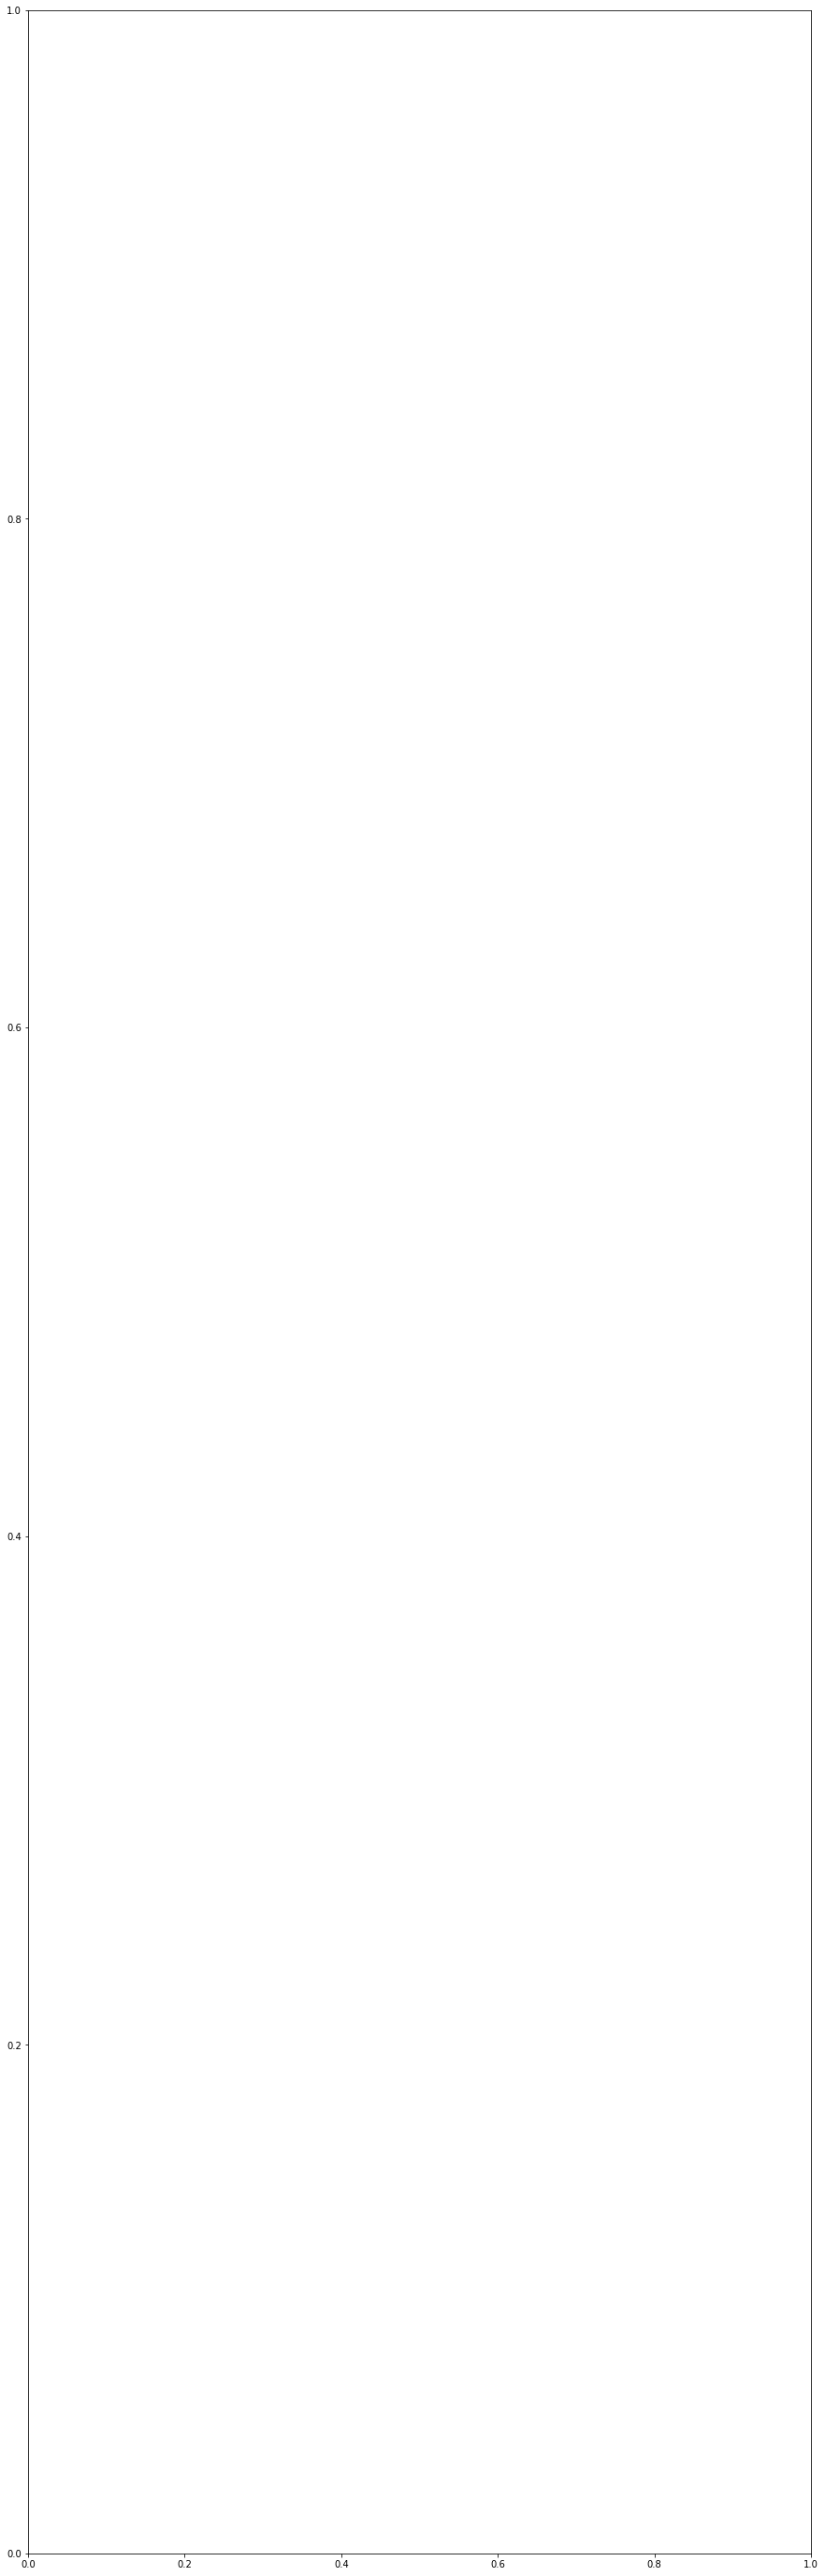

In [304]:
fig, ax  = plt.subplots(1,1, figsize=(15,50))
xgb.plot_importance(model, ax = ax)

In [396]:
train_lgb, test_lgb ,model = func(train,train_label,test,'lgb')

[1]	training's rmse: 0.735581	valid_1's rmse: 0.744065
Training until validation scores don't improve for 200 rounds.
[2]	training's rmse: 0.726673	valid_1's rmse: 0.737927
[3]	training's rmse: 0.7178	valid_1's rmse: 0.73117
[4]	training's rmse: 0.709531	valid_1's rmse: 0.72523
[5]	training's rmse: 0.702096	valid_1's rmse: 0.719343
[6]	training's rmse: 0.69398	valid_1's rmse: 0.713198
[7]	training's rmse: 0.686352	valid_1's rmse: 0.707999
[8]	training's rmse: 0.680132	valid_1's rmse: 0.703618
[9]	training's rmse: 0.672292	valid_1's rmse: 0.697895
[10]	training's rmse: 0.664709	valid_1's rmse: 0.692514
[11]	training's rmse: 0.65743	valid_1's rmse: 0.687683
[12]	training's rmse: 0.650563	valid_1's rmse: 0.683232
[13]	training's rmse: 0.644269	valid_1's rmse: 0.678727
[14]	training's rmse: 0.638486	valid_1's rmse: 0.674512
[15]	training's rmse: 0.632095	valid_1's rmse: 0.670328
[16]	training's rmse: 0.626344	valid_1's rmse: 0.666415
[17]	training's rmse: 0.620558	valid_1's rmse: 0.662379


[154]	training's rmse: 0.309279	valid_1's rmse: 0.524911
[155]	training's rmse: 0.307947	valid_1's rmse: 0.52462
[156]	training's rmse: 0.30726	valid_1's rmse: 0.524457
[157]	training's rmse: 0.305995	valid_1's rmse: 0.52426
[158]	training's rmse: 0.304937	valid_1's rmse: 0.524096
[159]	training's rmse: 0.303425	valid_1's rmse: 0.523823
[160]	training's rmse: 0.302562	valid_1's rmse: 0.52361
[161]	training's rmse: 0.30192	valid_1's rmse: 0.523542
[162]	training's rmse: 0.300977	valid_1's rmse: 0.523315
[163]	training's rmse: 0.300102	valid_1's rmse: 0.523098
[164]	training's rmse: 0.299555	valid_1's rmse: 0.52293
[165]	training's rmse: 0.298836	valid_1's rmse: 0.52279
[166]	training's rmse: 0.297853	valid_1's rmse: 0.522546
[167]	training's rmse: 0.296877	valid_1's rmse: 0.522309
[168]	training's rmse: 0.296312	valid_1's rmse: 0.522229
[169]	training's rmse: 0.295691	valid_1's rmse: 0.522051
[170]	training's rmse: 0.295062	valid_1's rmse: 0.521831
[171]	training's rmse: 0.294386	valid_

[300]	training's rmse: 0.204633	valid_1's rmse: 0.510549
[301]	training's rmse: 0.204002	valid_1's rmse: 0.510516
[302]	training's rmse: 0.203696	valid_1's rmse: 0.510486
[303]	training's rmse: 0.203341	valid_1's rmse: 0.510416
[304]	training's rmse: 0.202587	valid_1's rmse: 0.510389
[305]	training's rmse: 0.20242	valid_1's rmse: 0.510373
[306]	training's rmse: 0.201846	valid_1's rmse: 0.510325
[307]	training's rmse: 0.201235	valid_1's rmse: 0.510232
[308]	training's rmse: 0.200398	valid_1's rmse: 0.510099
[309]	training's rmse: 0.199908	valid_1's rmse: 0.510073
[310]	training's rmse: 0.199497	valid_1's rmse: 0.51007
[311]	training's rmse: 0.198805	valid_1's rmse: 0.510094
[312]	training's rmse: 0.198249	valid_1's rmse: 0.510048
[313]	training's rmse: 0.197702	valid_1's rmse: 0.509989
[314]	training's rmse: 0.196967	valid_1's rmse: 0.509871
[315]	training's rmse: 0.196506	valid_1's rmse: 0.50986
[316]	training's rmse: 0.196066	valid_1's rmse: 0.50986
[317]	training's rmse: 0.195734	val

[449]	training's rmse: 0.132292	valid_1's rmse: 0.506867
[450]	training's rmse: 0.132099	valid_1's rmse: 0.506871
[451]	training's rmse: 0.131726	valid_1's rmse: 0.506837
[452]	training's rmse: 0.131473	valid_1's rmse: 0.506843
[453]	training's rmse: 0.130993	valid_1's rmse: 0.506827
[454]	training's rmse: 0.130458	valid_1's rmse: 0.506813
[455]	training's rmse: 0.130022	valid_1's rmse: 0.506837
[456]	training's rmse: 0.129646	valid_1's rmse: 0.506812
[457]	training's rmse: 0.129271	valid_1's rmse: 0.506809
[458]	training's rmse: 0.128808	valid_1's rmse: 0.506819
[459]	training's rmse: 0.12841	valid_1's rmse: 0.506824
[460]	training's rmse: 0.128145	valid_1's rmse: 0.5068
[461]	training's rmse: 0.127982	valid_1's rmse: 0.506787
[462]	training's rmse: 0.12776	valid_1's rmse: 0.506776
[463]	training's rmse: 0.127249	valid_1's rmse: 0.506759
[464]	training's rmse: 0.126767	valid_1's rmse: 0.506739
[465]	training's rmse: 0.1263	valid_1's rmse: 0.506711
[466]	training's rmse: 0.126049	valid

[599]	training's rmse: 0.0869426	valid_1's rmse: 0.505464
[600]	training's rmse: 0.086698	valid_1's rmse: 0.505448
[601]	training's rmse: 0.0864909	valid_1's rmse: 0.50544
[602]	training's rmse: 0.0862193	valid_1's rmse: 0.505445
[603]	training's rmse: 0.0860065	valid_1's rmse: 0.505444
[604]	training's rmse: 0.0857689	valid_1's rmse: 0.505465
[605]	training's rmse: 0.0855782	valid_1's rmse: 0.505471
[606]	training's rmse: 0.0853015	valid_1's rmse: 0.505465
[607]	training's rmse: 0.0850707	valid_1's rmse: 0.505446
[608]	training's rmse: 0.0847925	valid_1's rmse: 0.505453
[609]	training's rmse: 0.0846375	valid_1's rmse: 0.505452
[610]	training's rmse: 0.0844017	valid_1's rmse: 0.505432
[611]	training's rmse: 0.0841499	valid_1's rmse: 0.505439
[612]	training's rmse: 0.0839192	valid_1's rmse: 0.505421
[613]	training's rmse: 0.0836974	valid_1's rmse: 0.505444
[614]	training's rmse: 0.0834297	valid_1's rmse: 0.505466
[615]	training's rmse: 0.0831339	valid_1's rmse: 0.505471
[616]	training's

[741]	training's rmse: 0.0614129	valid_1's rmse: 0.505
[742]	training's rmse: 0.0612901	valid_1's rmse: 0.505008
[743]	training's rmse: 0.0611577	valid_1's rmse: 0.505002
[744]	training's rmse: 0.0610212	valid_1's rmse: 0.504981
[745]	training's rmse: 0.0608992	valid_1's rmse: 0.504976
[746]	training's rmse: 0.0607859	valid_1's rmse: 0.50499
[747]	training's rmse: 0.0606771	valid_1's rmse: 0.504989
[748]	training's rmse: 0.0605488	valid_1's rmse: 0.504999
[749]	training's rmse: 0.0604381	valid_1's rmse: 0.504995
[750]	training's rmse: 0.0603562	valid_1's rmse: 0.505001
[751]	training's rmse: 0.0602386	valid_1's rmse: 0.504981
[752]	training's rmse: 0.0601124	valid_1's rmse: 0.504977
[753]	training's rmse: 0.0599405	valid_1's rmse: 0.504975
[754]	training's rmse: 0.0597965	valid_1's rmse: 0.504974
[755]	training's rmse: 0.0596917	valid_1's rmse: 0.50498
[756]	training's rmse: 0.0595485	valid_1's rmse: 0.504991
[757]	training's rmse: 0.0594477	valid_1's rmse: 0.504994
[758]	training's rm

[888]	training's rmse: 0.0472154	valid_1's rmse: 0.504794
[889]	training's rmse: 0.0471386	valid_1's rmse: 0.504801
[890]	training's rmse: 0.0470493	valid_1's rmse: 0.504806
[891]	training's rmse: 0.0469611	valid_1's rmse: 0.504822
[892]	training's rmse: 0.0468789	valid_1's rmse: 0.504823
[893]	training's rmse: 0.0467997	valid_1's rmse: 0.504823
[894]	training's rmse: 0.0467034	valid_1's rmse: 0.504824
[895]	training's rmse: 0.0466507	valid_1's rmse: 0.504826
[896]	training's rmse: 0.0465866	valid_1's rmse: 0.504821
[897]	training's rmse: 0.0465033	valid_1's rmse: 0.504822
[898]	training's rmse: 0.0464298	valid_1's rmse: 0.504815
[899]	training's rmse: 0.0463382	valid_1's rmse: 0.50481
[900]	training's rmse: 0.04626	valid_1's rmse: 0.504811
[901]	training's rmse: 0.046181	valid_1's rmse: 0.504801
[902]	training's rmse: 0.046105	valid_1's rmse: 0.504796
[903]	training's rmse: 0.0460255	valid_1's rmse: 0.504794
[904]	training's rmse: 0.0459653	valid_1's rmse: 0.504794
[905]	training's rm

[1031]	training's rmse: 0.0390336	valid_1's rmse: 0.504799
[1032]	training's rmse: 0.0389948	valid_1's rmse: 0.504806
[1033]	training's rmse: 0.0389533	valid_1's rmse: 0.504807
[1034]	training's rmse: 0.0389149	valid_1's rmse: 0.50481
[1035]	training's rmse: 0.0388734	valid_1's rmse: 0.504816
[1036]	training's rmse: 0.0388366	valid_1's rmse: 0.504811
[1037]	training's rmse: 0.0387962	valid_1's rmse: 0.50482
[1038]	training's rmse: 0.0387576	valid_1's rmse: 0.504815
[1039]	training's rmse: 0.0387184	valid_1's rmse: 0.504818
[1040]	training's rmse: 0.0386806	valid_1's rmse: 0.504816
[1041]	training's rmse: 0.0386521	valid_1's rmse: 0.504812
[1042]	training's rmse: 0.0386266	valid_1's rmse: 0.504811
[1043]	training's rmse: 0.0385954	valid_1's rmse: 0.504807
[1044]	training's rmse: 0.0385564	valid_1's rmse: 0.504802
[1045]	training's rmse: 0.0385111	valid_1's rmse: 0.504805
[1046]	training's rmse: 0.0384723	valid_1's rmse: 0.504806
[1047]	training's rmse: 0.0384343	valid_1's rmse: 0.504805

[113]	training's rmse: 0.357723	valid_1's rmse: 0.526284
[114]	training's rmse: 0.356286	valid_1's rmse: 0.52597
[115]	training's rmse: 0.355117	valid_1's rmse: 0.52566
[116]	training's rmse: 0.353654	valid_1's rmse: 0.525386
[117]	training's rmse: 0.35234	valid_1's rmse: 0.524979
[118]	training's rmse: 0.351099	valid_1's rmse: 0.524673
[119]	training's rmse: 0.349822	valid_1's rmse: 0.524256
[120]	training's rmse: 0.348247	valid_1's rmse: 0.523978
[121]	training's rmse: 0.347246	valid_1's rmse: 0.523707
[122]	training's rmse: 0.345837	valid_1's rmse: 0.523354
[123]	training's rmse: 0.344528	valid_1's rmse: 0.523088
[124]	training's rmse: 0.343154	valid_1's rmse: 0.522762
[125]	training's rmse: 0.341938	valid_1's rmse: 0.522568
[126]	training's rmse: 0.340515	valid_1's rmse: 0.522335
[127]	training's rmse: 0.339381	valid_1's rmse: 0.522137
[128]	training's rmse: 0.337794	valid_1's rmse: 0.521758
[129]	training's rmse: 0.336797	valid_1's rmse: 0.521494
[130]	training's rmse: 0.335538	va

[258]	training's rmse: 0.229744	valid_1's rmse: 0.503328
[259]	training's rmse: 0.228907	valid_1's rmse: 0.503267
[260]	training's rmse: 0.2282	valid_1's rmse: 0.503172
[261]	training's rmse: 0.227757	valid_1's rmse: 0.503095
[262]	training's rmse: 0.227179	valid_1's rmse: 0.502992
[263]	training's rmse: 0.226623	valid_1's rmse: 0.503011
[264]	training's rmse: 0.226028	valid_1's rmse: 0.502965
[265]	training's rmse: 0.225533	valid_1's rmse: 0.502912
[266]	training's rmse: 0.224985	valid_1's rmse: 0.502891
[267]	training's rmse: 0.224183	valid_1's rmse: 0.502899
[268]	training's rmse: 0.223606	valid_1's rmse: 0.502772
[269]	training's rmse: 0.223065	valid_1's rmse: 0.502765
[270]	training's rmse: 0.222539	valid_1's rmse: 0.502731
[271]	training's rmse: 0.221951	valid_1's rmse: 0.502608
[272]	training's rmse: 0.221265	valid_1's rmse: 0.502481
[273]	training's rmse: 0.220906	valid_1's rmse: 0.502451
[274]	training's rmse: 0.22053	valid_1's rmse: 0.502382
[275]	training's rmse: 0.219986	va

[404]	training's rmse: 0.154505	valid_1's rmse: 0.495955
[405]	training's rmse: 0.154124	valid_1's rmse: 0.49596
[406]	training's rmse: 0.153684	valid_1's rmse: 0.495919
[407]	training's rmse: 0.153198	valid_1's rmse: 0.495839
[408]	training's rmse: 0.152653	valid_1's rmse: 0.49578
[409]	training's rmse: 0.151986	valid_1's rmse: 0.495678
[410]	training's rmse: 0.151665	valid_1's rmse: 0.495636
[411]	training's rmse: 0.151226	valid_1's rmse: 0.495558
[412]	training's rmse: 0.15077	valid_1's rmse: 0.495617
[413]	training's rmse: 0.150231	valid_1's rmse: 0.495558
[414]	training's rmse: 0.15008	valid_1's rmse: 0.495513
[415]	training's rmse: 0.149732	valid_1's rmse: 0.495456
[416]	training's rmse: 0.149207	valid_1's rmse: 0.495409
[417]	training's rmse: 0.148637	valid_1's rmse: 0.495358
[418]	training's rmse: 0.147982	valid_1's rmse: 0.495274
[419]	training's rmse: 0.147531	valid_1's rmse: 0.495232
[420]	training's rmse: 0.147165	valid_1's rmse: 0.495142
[421]	training's rmse: 0.146499	val

[553]	training's rmse: 0.10167	valid_1's rmse: 0.492476
[554]	training's rmse: 0.101485	valid_1's rmse: 0.492446
[555]	training's rmse: 0.101084	valid_1's rmse: 0.492387
[556]	training's rmse: 0.100822	valid_1's rmse: 0.492382
[557]	training's rmse: 0.100533	valid_1's rmse: 0.492386
[558]	training's rmse: 0.100236	valid_1's rmse: 0.49237
[559]	training's rmse: 0.100008	valid_1's rmse: 0.492353
[560]	training's rmse: 0.0997159	valid_1's rmse: 0.49231
[561]	training's rmse: 0.0994703	valid_1's rmse: 0.492286
[562]	training's rmse: 0.0990909	valid_1's rmse: 0.492286
[563]	training's rmse: 0.0987554	valid_1's rmse: 0.492228
[564]	training's rmse: 0.0983917	valid_1's rmse: 0.492206
[565]	training's rmse: 0.0981134	valid_1's rmse: 0.492171
[566]	training's rmse: 0.0978456	valid_1's rmse: 0.49219
[567]	training's rmse: 0.0976148	valid_1's rmse: 0.492197
[568]	training's rmse: 0.0973106	valid_1's rmse: 0.492179
[569]	training's rmse: 0.0971357	valid_1's rmse: 0.492169
[570]	training's rmse: 0.

[697]	training's rmse: 0.0693994	valid_1's rmse: 0.491475
[698]	training's rmse: 0.0691883	valid_1's rmse: 0.49147
[699]	training's rmse: 0.0690118	valid_1's rmse: 0.491458
[700]	training's rmse: 0.0687784	valid_1's rmse: 0.491458
[701]	training's rmse: 0.0685843	valid_1's rmse: 0.491474
[702]	training's rmse: 0.0683878	valid_1's rmse: 0.491466
[703]	training's rmse: 0.0682482	valid_1's rmse: 0.491455
[704]	training's rmse: 0.0680907	valid_1's rmse: 0.491435
[705]	training's rmse: 0.0679384	valid_1's rmse: 0.491447
[706]	training's rmse: 0.0677919	valid_1's rmse: 0.491456
[707]	training's rmse: 0.0676407	valid_1's rmse: 0.491465
[708]	training's rmse: 0.0674639	valid_1's rmse: 0.491464
[709]	training's rmse: 0.067306	valid_1's rmse: 0.491449
[710]	training's rmse: 0.0671695	valid_1's rmse: 0.491443
[711]	training's rmse: 0.0670051	valid_1's rmse: 0.49142
[712]	training's rmse: 0.0668253	valid_1's rmse: 0.491395
[713]	training's rmse: 0.0666894	valid_1's rmse: 0.491387
[714]	training's 

[841]	training's rmse: 0.0504105	valid_1's rmse: 0.491018
[842]	training's rmse: 0.0503124	valid_1's rmse: 0.491014
[843]	training's rmse: 0.0502033	valid_1's rmse: 0.490997
[844]	training's rmse: 0.0501285	valid_1's rmse: 0.490989
[845]	training's rmse: 0.0500314	valid_1's rmse: 0.490988
[846]	training's rmse: 0.0499373	valid_1's rmse: 0.490976
[847]	training's rmse: 0.0498477	valid_1's rmse: 0.490978
[848]	training's rmse: 0.0497292	valid_1's rmse: 0.490969
[849]	training's rmse: 0.0496548	valid_1's rmse: 0.490961
[850]	training's rmse: 0.0495532	valid_1's rmse: 0.490974
[851]	training's rmse: 0.0494523	valid_1's rmse: 0.490978
[852]	training's rmse: 0.0493685	valid_1's rmse: 0.490965
[853]	training's rmse: 0.0492715	valid_1's rmse: 0.490962
[854]	training's rmse: 0.0491839	valid_1's rmse: 0.490957
[855]	training's rmse: 0.04907	valid_1's rmse: 0.490959
[856]	training's rmse: 0.048975	valid_1's rmse: 0.490961
[857]	training's rmse: 0.0489042	valid_1's rmse: 0.490952
[858]	training's 

[988]	training's rmse: 0.0398158	valid_1's rmse: 0.490607
[989]	training's rmse: 0.0397548	valid_1's rmse: 0.490595
[990]	training's rmse: 0.0397049	valid_1's rmse: 0.490603
[991]	training's rmse: 0.03966	valid_1's rmse: 0.490594
[992]	training's rmse: 0.0396058	valid_1's rmse: 0.490598
[993]	training's rmse: 0.0395515	valid_1's rmse: 0.490602
[994]	training's rmse: 0.0394963	valid_1's rmse: 0.490604
[995]	training's rmse: 0.0394548	valid_1's rmse: 0.490603
[996]	training's rmse: 0.0393994	valid_1's rmse: 0.490595
[997]	training's rmse: 0.0393552	valid_1's rmse: 0.490594
[998]	training's rmse: 0.0392861	valid_1's rmse: 0.490585
[999]	training's rmse: 0.0392374	valid_1's rmse: 0.490585
[1000]	training's rmse: 0.0391762	valid_1's rmse: 0.490588
[1001]	training's rmse: 0.039137	valid_1's rmse: 0.490585
[1002]	training's rmse: 0.0390813	valid_1's rmse: 0.49058
[1003]	training's rmse: 0.0390351	valid_1's rmse: 0.490586
[1004]	training's rmse: 0.0389821	valid_1's rmse: 0.49058
[1005]	trainin

[1131]	training's rmse: 0.0339857	valid_1's rmse: 0.490427
[1132]	training's rmse: 0.0339657	valid_1's rmse: 0.490424
[1133]	training's rmse: 0.0339428	valid_1's rmse: 0.490421
[1134]	training's rmse: 0.03391	valid_1's rmse: 0.490418
[1135]	training's rmse: 0.0338826	valid_1's rmse: 0.490415
[1136]	training's rmse: 0.0338515	valid_1's rmse: 0.49042
[1137]	training's rmse: 0.0338233	valid_1's rmse: 0.490424
[1138]	training's rmse: 0.033789	valid_1's rmse: 0.490424
[1139]	training's rmse: 0.0337626	valid_1's rmse: 0.490424
[1140]	training's rmse: 0.033736	valid_1's rmse: 0.490431
[1141]	training's rmse: 0.0337056	valid_1's rmse: 0.490429
[1142]	training's rmse: 0.0336873	valid_1's rmse: 0.490426
[1143]	training's rmse: 0.033661	valid_1's rmse: 0.49043
[1144]	training's rmse: 0.0336349	valid_1's rmse: 0.490426
[1145]	training's rmse: 0.0336014	valid_1's rmse: 0.490429
[1146]	training's rmse: 0.0335715	valid_1's rmse: 0.490423
[1147]	training's rmse: 0.0335481	valid_1's rmse: 0.490423
[114

[1276]	training's rmse: 0.0307821	valid_1's rmse: 0.490355
[1277]	training's rmse: 0.0307548	valid_1's rmse: 0.490353
[1278]	training's rmse: 0.0307343	valid_1's rmse: 0.490353
[1279]	training's rmse: 0.0307163	valid_1's rmse: 0.49035
[1280]	training's rmse: 0.0307005	valid_1's rmse: 0.490348
[1281]	training's rmse: 0.030683	valid_1's rmse: 0.490345
[1282]	training's rmse: 0.0306602	valid_1's rmse: 0.490341
[1283]	training's rmse: 0.0306441	valid_1's rmse: 0.490342
[1284]	training's rmse: 0.0306284	valid_1's rmse: 0.49034
[1285]	training's rmse: 0.0306138	valid_1's rmse: 0.490337
[1286]	training's rmse: 0.0305965	valid_1's rmse: 0.490335
[1287]	training's rmse: 0.0305802	valid_1's rmse: 0.490335
[1288]	training's rmse: 0.0305652	valid_1's rmse: 0.490335
[1289]	training's rmse: 0.0305467	valid_1's rmse: 0.490334
[1290]	training's rmse: 0.0305333	valid_1's rmse: 0.490336
[1291]	training's rmse: 0.0305175	valid_1's rmse: 0.490335
[1292]	training's rmse: 0.0305018	valid_1's rmse: 0.490336


[1416]	training's rmse: 0.0288156	valid_1's rmse: 0.490285
[1417]	training's rmse: 0.0288051	valid_1's rmse: 0.490282
[1418]	training's rmse: 0.0287962	valid_1's rmse: 0.49028
[1419]	training's rmse: 0.0287846	valid_1's rmse: 0.490278
[1420]	training's rmse: 0.0287766	valid_1's rmse: 0.490277
[1421]	training's rmse: 0.0287663	valid_1's rmse: 0.490276
[1422]	training's rmse: 0.0287539	valid_1's rmse: 0.490274
[1423]	training's rmse: 0.0287433	valid_1's rmse: 0.490275
[1424]	training's rmse: 0.0287329	valid_1's rmse: 0.490278
[1425]	training's rmse: 0.0287217	valid_1's rmse: 0.490279
[1426]	training's rmse: 0.0287106	valid_1's rmse: 0.490279
[1427]	training's rmse: 0.0286945	valid_1's rmse: 0.49028
[1428]	training's rmse: 0.0286831	valid_1's rmse: 0.490279
[1429]	training's rmse: 0.0286723	valid_1's rmse: 0.490277
[1430]	training's rmse: 0.0286604	valid_1's rmse: 0.490277
[1431]	training's rmse: 0.0286505	valid_1's rmse: 0.490278
[1432]	training's rmse: 0.0286356	valid_1's rmse: 0.490278

[1566]	training's rmse: 0.0275326	valid_1's rmse: 0.490255
[1567]	training's rmse: 0.0275284	valid_1's rmse: 0.490255
[1568]	training's rmse: 0.0275222	valid_1's rmse: 0.490255
[1569]	training's rmse: 0.0275147	valid_1's rmse: 0.490252
[1570]	training's rmse: 0.0275088	valid_1's rmse: 0.490251
[1571]	training's rmse: 0.0275008	valid_1's rmse: 0.490254
[1572]	training's rmse: 0.0274971	valid_1's rmse: 0.490254
[1573]	training's rmse: 0.0274922	valid_1's rmse: 0.490254
[1574]	training's rmse: 0.0274878	valid_1's rmse: 0.490254
[1575]	training's rmse: 0.027481	valid_1's rmse: 0.490255
[1576]	training's rmse: 0.0274741	valid_1's rmse: 0.490257
[1577]	training's rmse: 0.0274703	valid_1's rmse: 0.490256
[1578]	training's rmse: 0.0274654	valid_1's rmse: 0.490255
[1579]	training's rmse: 0.0274623	valid_1's rmse: 0.490257
[1580]	training's rmse: 0.0274539	valid_1's rmse: 0.490256
[1581]	training's rmse: 0.0274477	valid_1's rmse: 0.490256
[1582]	training's rmse: 0.0274446	valid_1's rmse: 0.49025

[1765]	training's rmse: 0.027107	valid_1's rmse: 0.490235
[1766]	training's rmse: 0.027107	valid_1's rmse: 0.490235
[1767]	training's rmse: 0.027107	valid_1's rmse: 0.490235
[1768]	training's rmse: 0.027107	valid_1's rmse: 0.490235
[1769]	training's rmse: 0.027107	valid_1's rmse: 0.490235
[1770]	training's rmse: 0.027107	valid_1's rmse: 0.490235
[1771]	training's rmse: 0.027107	valid_1's rmse: 0.490235
[1772]	training's rmse: 0.027107	valid_1's rmse: 0.490235
[1773]	training's rmse: 0.027107	valid_1's rmse: 0.490235
[1774]	training's rmse: 0.027107	valid_1's rmse: 0.490235
[1775]	training's rmse: 0.027107	valid_1's rmse: 0.490235
[1776]	training's rmse: 0.027107	valid_1's rmse: 0.490235
[1777]	training's rmse: 0.027107	valid_1's rmse: 0.490235
[1778]	training's rmse: 0.027107	valid_1's rmse: 0.490235
[1779]	training's rmse: 0.027107	valid_1's rmse: 0.490235
[1780]	training's rmse: 0.027107	valid_1's rmse: 0.490235
[1781]	training's rmse: 0.027107	valid_1's rmse: 0.490235
[1782]	trainin

[1910]	training's rmse: 0.027107	valid_1's rmse: 0.490235
[1911]	training's rmse: 0.027107	valid_1's rmse: 0.490235
[1912]	training's rmse: 0.027107	valid_1's rmse: 0.490235
[1913]	training's rmse: 0.027107	valid_1's rmse: 0.490235
Early stopping, best iteration is:
[1713]	training's rmse: 0.0271108	valid_1's rmse: 0.490235
[1]	training's rmse: 0.739542	valid_1's rmse: 0.737514
Training until validation scores don't improve for 200 rounds.
[2]	training's rmse: 0.730699	valid_1's rmse: 0.731416
[3]	training's rmse: 0.721395	valid_1's rmse: 0.72439
[4]	training's rmse: 0.713652	valid_1's rmse: 0.718377
[5]	training's rmse: 0.706396	valid_1's rmse: 0.712988
[6]	training's rmse: 0.698207	valid_1's rmse: 0.707279
[7]	training's rmse: 0.691085	valid_1's rmse: 0.702078
[8]	training's rmse: 0.684618	valid_1's rmse: 0.697479
[9]	training's rmse: 0.67714	valid_1's rmse: 0.691748
[10]	training's rmse: 0.669357	valid_1's rmse: 0.686175
[11]	training's rmse: 0.661923	valid_1's rmse: 0.681263
[12]	t

[147]	training's rmse: 0.308475	valid_1's rmse: 0.51219
[148]	training's rmse: 0.30759	valid_1's rmse: 0.512048
[149]	training's rmse: 0.306263	valid_1's rmse: 0.511882
[150]	training's rmse: 0.305035	valid_1's rmse: 0.511641
[151]	training's rmse: 0.303941	valid_1's rmse: 0.511471
[152]	training's rmse: 0.30259	valid_1's rmse: 0.511218
[153]	training's rmse: 0.301847	valid_1's rmse: 0.51102
[154]	training's rmse: 0.30077	valid_1's rmse: 0.5108
[155]	training's rmse: 0.299796	valid_1's rmse: 0.510714
[156]	training's rmse: 0.299045	valid_1's rmse: 0.510594
[157]	training's rmse: 0.297788	valid_1's rmse: 0.510207
[158]	training's rmse: 0.296885	valid_1's rmse: 0.509962
[159]	training's rmse: 0.295633	valid_1's rmse: 0.509814
[160]	training's rmse: 0.294636	valid_1's rmse: 0.50965
[161]	training's rmse: 0.293431	valid_1's rmse: 0.509548
[162]	training's rmse: 0.29227	valid_1's rmse: 0.50941
[163]	training's rmse: 0.291397	valid_1's rmse: 0.509233
[164]	training's rmse: 0.29009	valid_1's 

[298]	training's rmse: 0.195298	valid_1's rmse: 0.496009
[299]	training's rmse: 0.194603	valid_1's rmse: 0.495955
[300]	training's rmse: 0.193923	valid_1's rmse: 0.495902
[301]	training's rmse: 0.193166	valid_1's rmse: 0.495826
[302]	training's rmse: 0.192459	valid_1's rmse: 0.495823
[303]	training's rmse: 0.192039	valid_1's rmse: 0.49579
[304]	training's rmse: 0.191418	valid_1's rmse: 0.495683
[305]	training's rmse: 0.190923	valid_1's rmse: 0.495581
[306]	training's rmse: 0.190413	valid_1's rmse: 0.495537
[307]	training's rmse: 0.189835	valid_1's rmse: 0.495489
[308]	training's rmse: 0.189366	valid_1's rmse: 0.495513
[309]	training's rmse: 0.18897	valid_1's rmse: 0.495535
[310]	training's rmse: 0.188498	valid_1's rmse: 0.495446
[311]	training's rmse: 0.188129	valid_1's rmse: 0.49543
[312]	training's rmse: 0.187644	valid_1's rmse: 0.495338
[313]	training's rmse: 0.18683	valid_1's rmse: 0.495274
[314]	training's rmse: 0.186196	valid_1's rmse: 0.495243
[315]	training's rmse: 0.185512	val

[448]	training's rmse: 0.124453	valid_1's rmse: 0.491913
[449]	training's rmse: 0.124102	valid_1's rmse: 0.491875
[450]	training's rmse: 0.123818	valid_1's rmse: 0.491874
[451]	training's rmse: 0.123458	valid_1's rmse: 0.491895
[452]	training's rmse: 0.123042	valid_1's rmse: 0.491845
[453]	training's rmse: 0.122589	valid_1's rmse: 0.491811
[454]	training's rmse: 0.122448	valid_1's rmse: 0.491778
[455]	training's rmse: 0.121983	valid_1's rmse: 0.491779
[456]	training's rmse: 0.121722	valid_1's rmse: 0.491736
[457]	training's rmse: 0.121411	valid_1's rmse: 0.491723
[458]	training's rmse: 0.121232	valid_1's rmse: 0.491771
[459]	training's rmse: 0.121009	valid_1's rmse: 0.491774
[460]	training's rmse: 0.12064	valid_1's rmse: 0.491807
[461]	training's rmse: 0.120305	valid_1's rmse: 0.49176
[462]	training's rmse: 0.120031	valid_1's rmse: 0.49174
[463]	training's rmse: 0.119702	valid_1's rmse: 0.491721
[464]	training's rmse: 0.119241	valid_1's rmse: 0.491727
[465]	training's rmse: 0.118828	va

[591]	training's rmse: 0.0835299	valid_1's rmse: 0.490375
[592]	training's rmse: 0.083313	valid_1's rmse: 0.490368
[593]	training's rmse: 0.0830115	valid_1's rmse: 0.49037
[594]	training's rmse: 0.0827936	valid_1's rmse: 0.490404
[595]	training's rmse: 0.0825747	valid_1's rmse: 0.490396
[596]	training's rmse: 0.0823489	valid_1's rmse: 0.490381
[597]	training's rmse: 0.0821633	valid_1's rmse: 0.490368
[598]	training's rmse: 0.0819984	valid_1's rmse: 0.490377
[599]	training's rmse: 0.0817906	valid_1's rmse: 0.490357
[600]	training's rmse: 0.0815381	valid_1's rmse: 0.490367
[601]	training's rmse: 0.0812928	valid_1's rmse: 0.490355
[602]	training's rmse: 0.0811373	valid_1's rmse: 0.490343
[603]	training's rmse: 0.0809014	valid_1's rmse: 0.490337
[604]	training's rmse: 0.0806851	valid_1's rmse: 0.490321
[605]	training's rmse: 0.08042	valid_1's rmse: 0.49031
[606]	training's rmse: 0.0801934	valid_1's rmse: 0.490324
[607]	training's rmse: 0.0799876	valid_1's rmse: 0.490291
[608]	training's rm

[738]	training's rmse: 0.0575478	valid_1's rmse: 0.489911
[739]	training's rmse: 0.0574027	valid_1's rmse: 0.48992
[740]	training's rmse: 0.0572601	valid_1's rmse: 0.489917
[741]	training's rmse: 0.0571332	valid_1's rmse: 0.489921
[742]	training's rmse: 0.0569826	valid_1's rmse: 0.489926
[743]	training's rmse: 0.0568607	valid_1's rmse: 0.489928
[744]	training's rmse: 0.0567162	valid_1's rmse: 0.489919
[745]	training's rmse: 0.0566037	valid_1's rmse: 0.489927
[746]	training's rmse: 0.0564711	valid_1's rmse: 0.489933
[747]	training's rmse: 0.0563283	valid_1's rmse: 0.489922
[748]	training's rmse: 0.0562206	valid_1's rmse: 0.489909
[749]	training's rmse: 0.0561174	valid_1's rmse: 0.489912
[750]	training's rmse: 0.0560359	valid_1's rmse: 0.489908
[751]	training's rmse: 0.0559391	valid_1's rmse: 0.489895
[752]	training's rmse: 0.0558006	valid_1's rmse: 0.489884
[753]	training's rmse: 0.0556729	valid_1's rmse: 0.489881
[754]	training's rmse: 0.055532	valid_1's rmse: 0.489865
[755]	training's

[880]	training's rmse: 0.0440928	valid_1's rmse: 0.489877
[881]	training's rmse: 0.0440492	valid_1's rmse: 0.489876
[882]	training's rmse: 0.0439673	valid_1's rmse: 0.489877
[883]	training's rmse: 0.0438873	valid_1's rmse: 0.489866
[884]	training's rmse: 0.0438115	valid_1's rmse: 0.489857
[885]	training's rmse: 0.0437559	valid_1's rmse: 0.489857
[886]	training's rmse: 0.0437111	valid_1's rmse: 0.489861
[887]	training's rmse: 0.0436352	valid_1's rmse: 0.48985
[888]	training's rmse: 0.0435669	valid_1's rmse: 0.489853
[889]	training's rmse: 0.0435008	valid_1's rmse: 0.489852
[890]	training's rmse: 0.0434303	valid_1's rmse: 0.489848
[891]	training's rmse: 0.0433945	valid_1's rmse: 0.489843
[892]	training's rmse: 0.0433301	valid_1's rmse: 0.489844
[893]	training's rmse: 0.0432599	valid_1's rmse: 0.489841
[894]	training's rmse: 0.0431917	valid_1's rmse: 0.489838
[895]	training's rmse: 0.0431135	valid_1's rmse: 0.489836
[896]	training's rmse: 0.0430562	valid_1's rmse: 0.48984
[897]	training's

[1022]	training's rmse: 0.03685	valid_1's rmse: 0.489852
[1023]	training's rmse: 0.0368098	valid_1's rmse: 0.489852
[1024]	training's rmse: 0.0367733	valid_1's rmse: 0.489857
[1025]	training's rmse: 0.0367426	valid_1's rmse: 0.489859
[1026]	training's rmse: 0.0367013	valid_1's rmse: 0.489858
[1027]	training's rmse: 0.0366598	valid_1's rmse: 0.489856
[1028]	training's rmse: 0.0366238	valid_1's rmse: 0.489851
[1029]	training's rmse: 0.0365853	valid_1's rmse: 0.489848
[1030]	training's rmse: 0.0365416	valid_1's rmse: 0.489845
[1031]	training's rmse: 0.0365037	valid_1's rmse: 0.489842
[1032]	training's rmse: 0.0364657	valid_1's rmse: 0.489839
[1033]	training's rmse: 0.0364147	valid_1's rmse: 0.48984
[1034]	training's rmse: 0.0363808	valid_1's rmse: 0.489845
[1035]	training's rmse: 0.0363541	valid_1's rmse: 0.489845
[1036]	training's rmse: 0.0363072	valid_1's rmse: 0.489848
[1037]	training's rmse: 0.0362766	valid_1's rmse: 0.489847
[1038]	training's rmse: 0.0362406	valid_1's rmse: 0.489838


[1162]	training's rmse: 0.0327077	valid_1's rmse: 0.489812
[1163]	training's rmse: 0.0326859	valid_1's rmse: 0.489814
[1164]	training's rmse: 0.0326661	valid_1's rmse: 0.489816
[1165]	training's rmse: 0.0326452	valid_1's rmse: 0.489817
[1166]	training's rmse: 0.0326225	valid_1's rmse: 0.489819
[1167]	training's rmse: 0.0326044	valid_1's rmse: 0.489819
[1168]	training's rmse: 0.0325706	valid_1's rmse: 0.489822
[1169]	training's rmse: 0.0325433	valid_1's rmse: 0.489823
[1170]	training's rmse: 0.0325255	valid_1's rmse: 0.489823
[1171]	training's rmse: 0.0325082	valid_1's rmse: 0.48982
[1172]	training's rmse: 0.0324871	valid_1's rmse: 0.48982
[1173]	training's rmse: 0.0324574	valid_1's rmse: 0.489822
[1174]	training's rmse: 0.0324375	valid_1's rmse: 0.489822
[1175]	training's rmse: 0.0324221	valid_1's rmse: 0.489819
[1176]	training's rmse: 0.0323969	valid_1's rmse: 0.489825
[1177]	training's rmse: 0.0323754	valid_1's rmse: 0.489826
[1178]	training's rmse: 0.0323563	valid_1's rmse: 0.489825

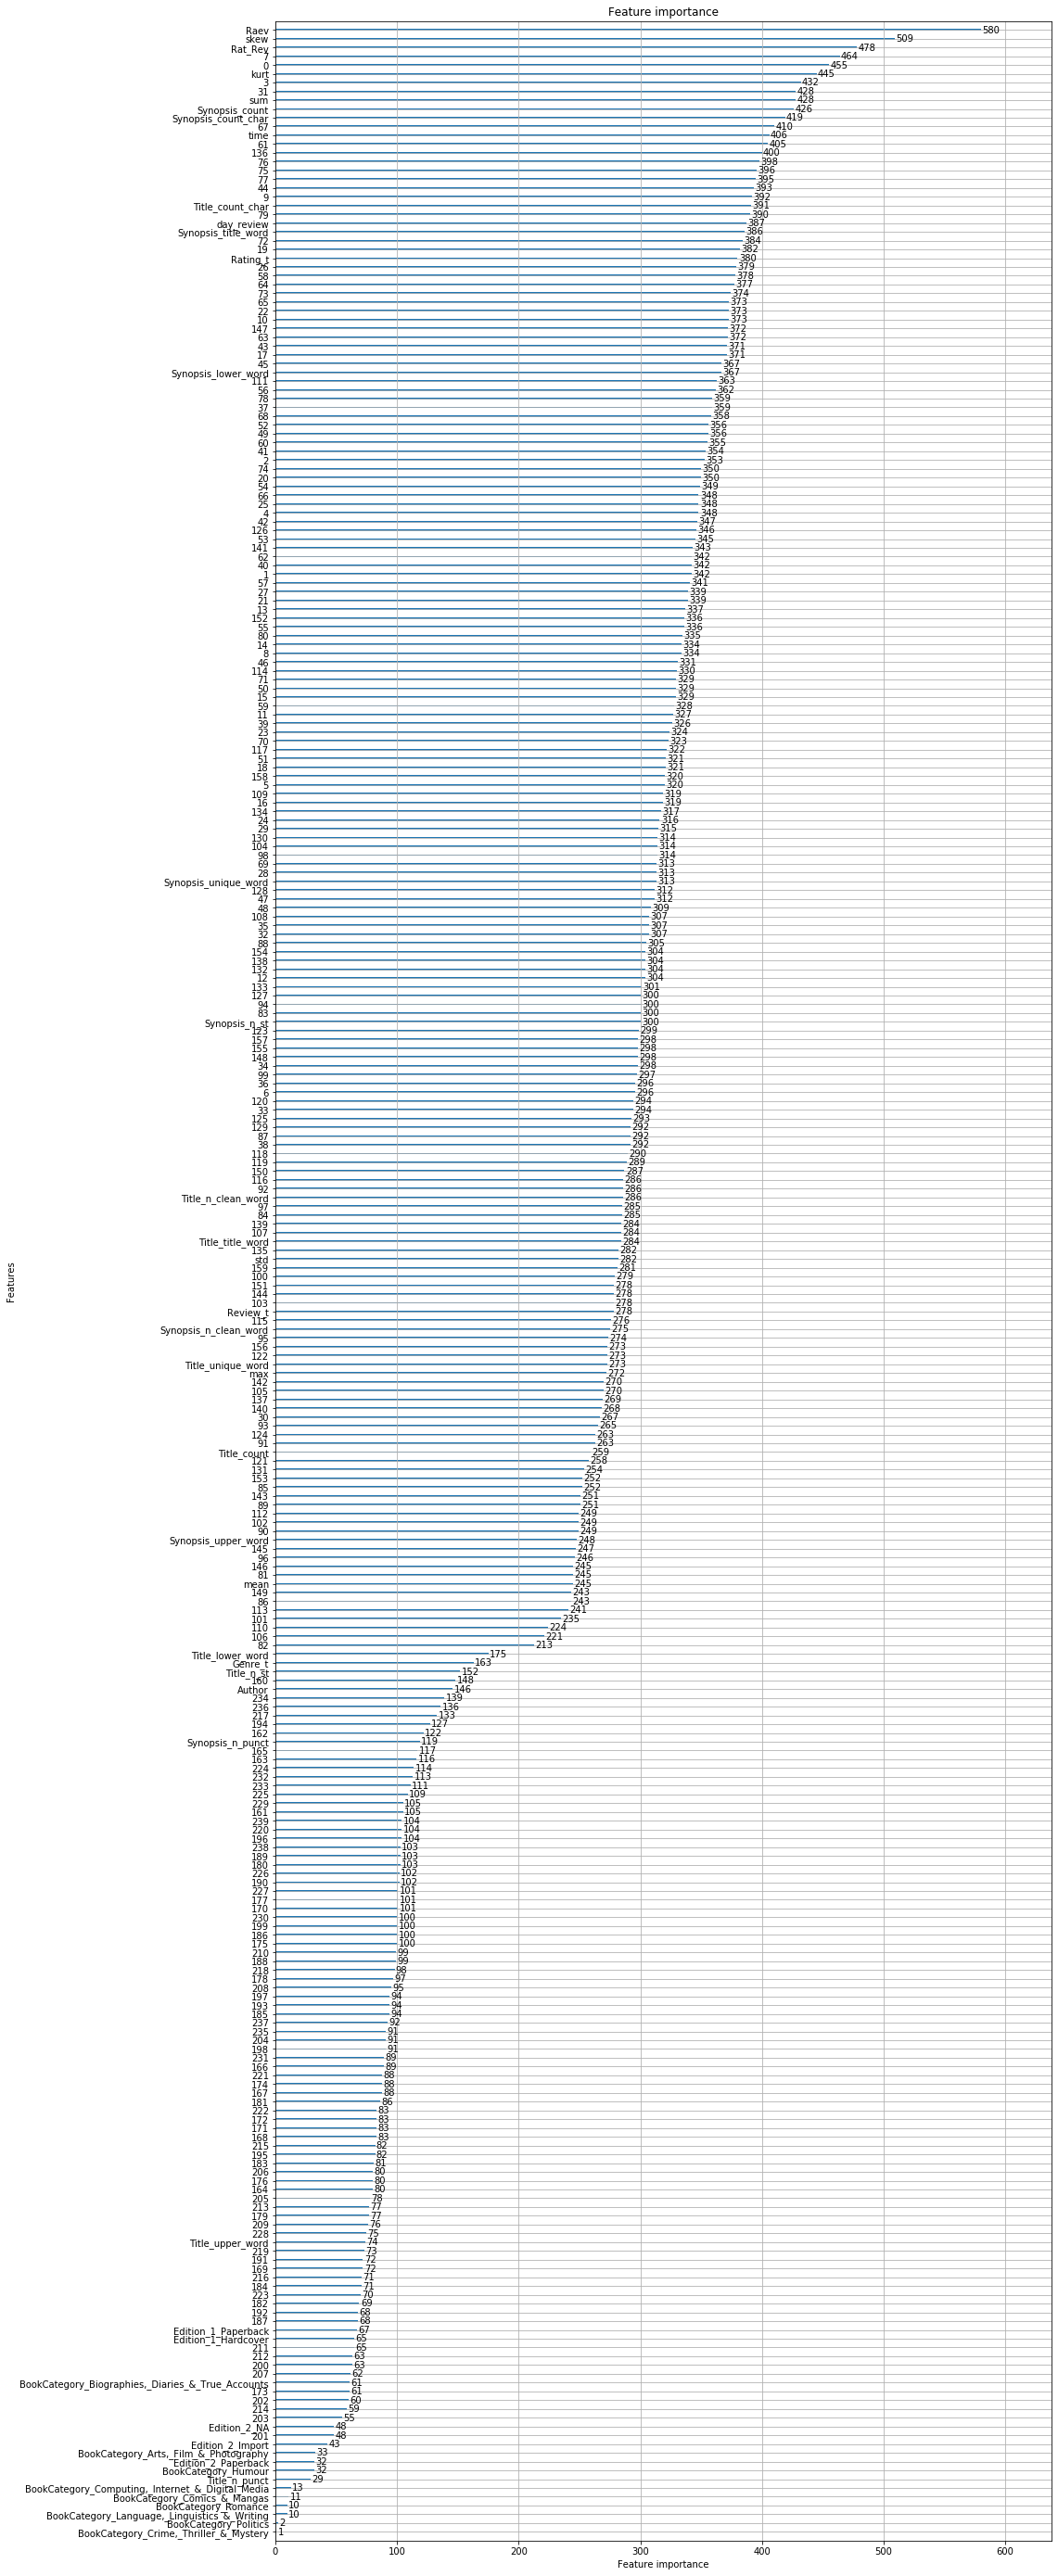

In [397]:
fig, ax  = plt.subplots(1,1, figsize=(15,50))
lgb.plot_importance(model, ax= ax)

In [398]:
test_lgb_1 = np.exp(test_lgb)-1
#test_xgb_1 = np.exp(test_xgb)-1

In [399]:
answer1 = np.mean(test_lgb_1, axis = 1)

In [188]:
df = pd.concat([test_lgb_1, test_xgb_1], axis = 1)
answer1 = np.mean(df, axis = 1)

In [308]:
train_xgb_1 = np.exp(train_xgb)-1
train_lgb_1 = np.exp(train_lgb)-1

In [332]:
from sklearn.model_selection import RandomizedSearchCV
param = {'max_depth':[7,9,11,13,15], 'min_samples_split':[19,27,33,37,41], 'min_samples_leaf':[25,27,33,37,41],
        'max_leaf_nodes': [15,21,25,29,33], 'n_estimators':[800]}
r = RandomizedSearchCV(param_distributions=param , estimator=rf, scoring=metric)
r.fit(pd.concat([train_lgb_1, train_xgb_1], axis = 1), np.exp(train_label)-1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   rando...b

In [333]:
r.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
                      max_features='auto', max_leaf_nodes=33,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=41, min_samples_split=41,
                      min_weight_fraction_leaf=0.0, n_estimators=800,
                      n_jobs=None, oob_score=False, random_state=19, verbose=0,
                      warm_start=False)

In [336]:
r.best_score_

0.8681587602577643

In [337]:
rf = r.best_estimator_

In [339]:
%%time
from sklearn.ensemble import RandomForestRegressor


rf.fit(pd.concat([train_lgb_1, train_xgb_1], axis = 1), np.exp(train_label)-1)
answer = rf.predict(pd.concat([test_lgb_1, test_xgb_1], axis = 1))

Wall time: 17.9 s


In [62]:
sample.Price = np.exp(answer)-1

In [400]:
sample.Price = answer1.values

In [340]:
sample.Price = answer

In [63]:
sample.to_excel('answer8.xlsx', index=False)

In [64]:
sample

,Price
0,457.884553
1,1378.492759
2,361.764520
3,781.779542
4,412.890409
...,...
1555,1653.850099
1556,190.114087
1557,525.194058
1558,422.810321


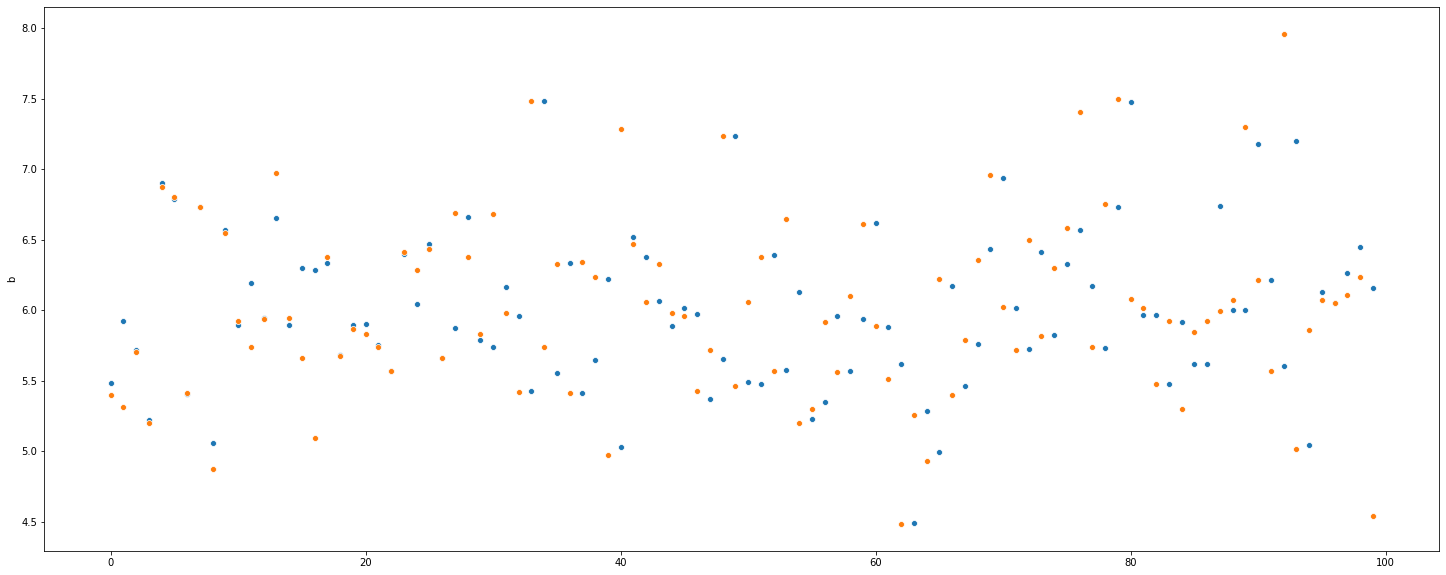

In [810]:
df = pd.concat([train_lgb[0], train_label], axis = 1)
df.columns = ['a','b']
df.reset_index(inplace=True)
plt.figure(figsize=(25,10))
sns.scatterplot(df.index[0:100], df.a[0:100])
sns.scatterplot(df.index[0:100], df.b[0:100])
#df.iloc[0:10].plot('index', 'b', colors = 'r',kind='scatter')
#df.iloc[0:10].plot('index', 'a', colors = 'r',kind='scatter')